***Time series Forecasting on Boston Robberies***

In [180]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 
import warnings
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import boxcox
from math import sqrt
from math import log
from math import exp

warnings.filterwarnings("ignore")
%matplotlib inline

In [28]:
df = pd.read_csv('../input/deep_Learning_for_time_series_forecasting_datasets/monthly-robberies.csv', header=0, index_col=0, parse_dates=True)

In [29]:
train, test = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]

In [30]:
len(train), len(test)

(106, 12)

In [31]:
train.to_csv('../output/robberies_dataset/train.csv', header=False)
test.to_csv('../output/robberies_dataset/test.csv', header=False)

***Model Evaluation***

In [32]:
df = pd.read_csv('../output/robberies_dataset/train.csv', header=None, index_col=0)

In [33]:
df

,1
0,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43
...,...
1974-06-01,287
1974-07-01,355
1974-08-01,460


In [34]:
X = df.values
X = X.astype('float32')
train_size = int(len(X)*0.5)
train, test = X[0:train_size],X[train_size:]

In [35]:
history = [x for x in train]
prediction = list()
for i in range(len(test)):
    yhat = history[-1]
    prediction.append(yhat)
    obs = test[i]
    history.append(obs)
rmse = sqrt(mean_squared_error(test, prediction))
print(f'RMSE: {rmse}')

RMSE: 51.84355927858228


In [36]:
df = pd.read_csv('../output/robberies_dataset/train.csv', header=None, index_col=0, parse_dates=True)
df.describe()


,1
count,106.000000
mean,173.103774
std,112.231133
min,29.000000
25%,74.750000
50%,144.500000
75%,271.750000
max,487.000000


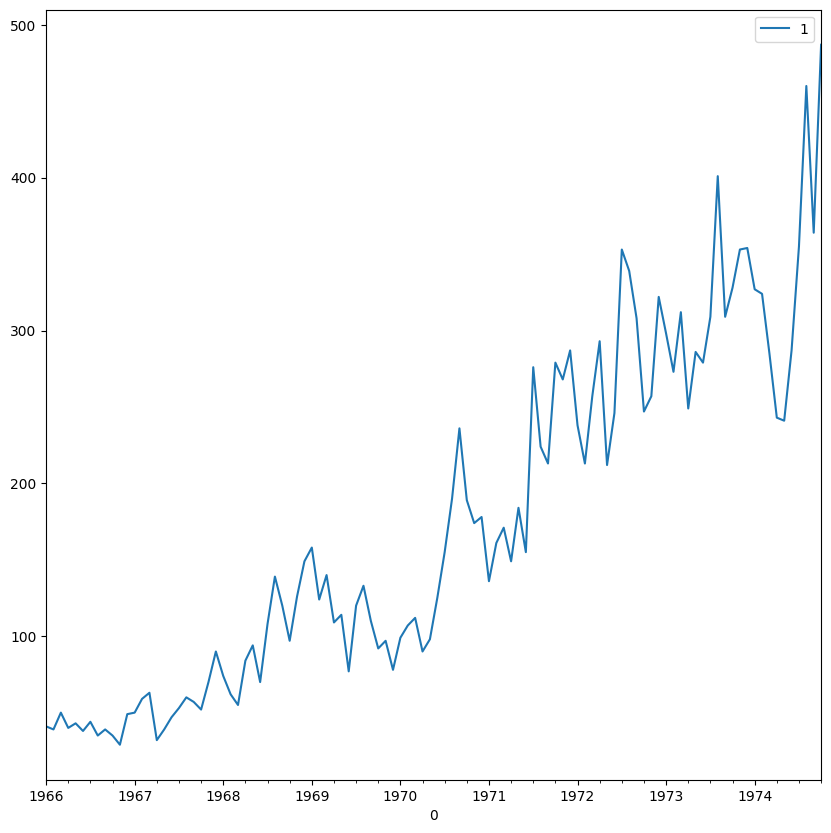

In [37]:
df.plot(figsize=(10,10))
plt.show()

<Figure size 2000x2000 with 0 Axes>

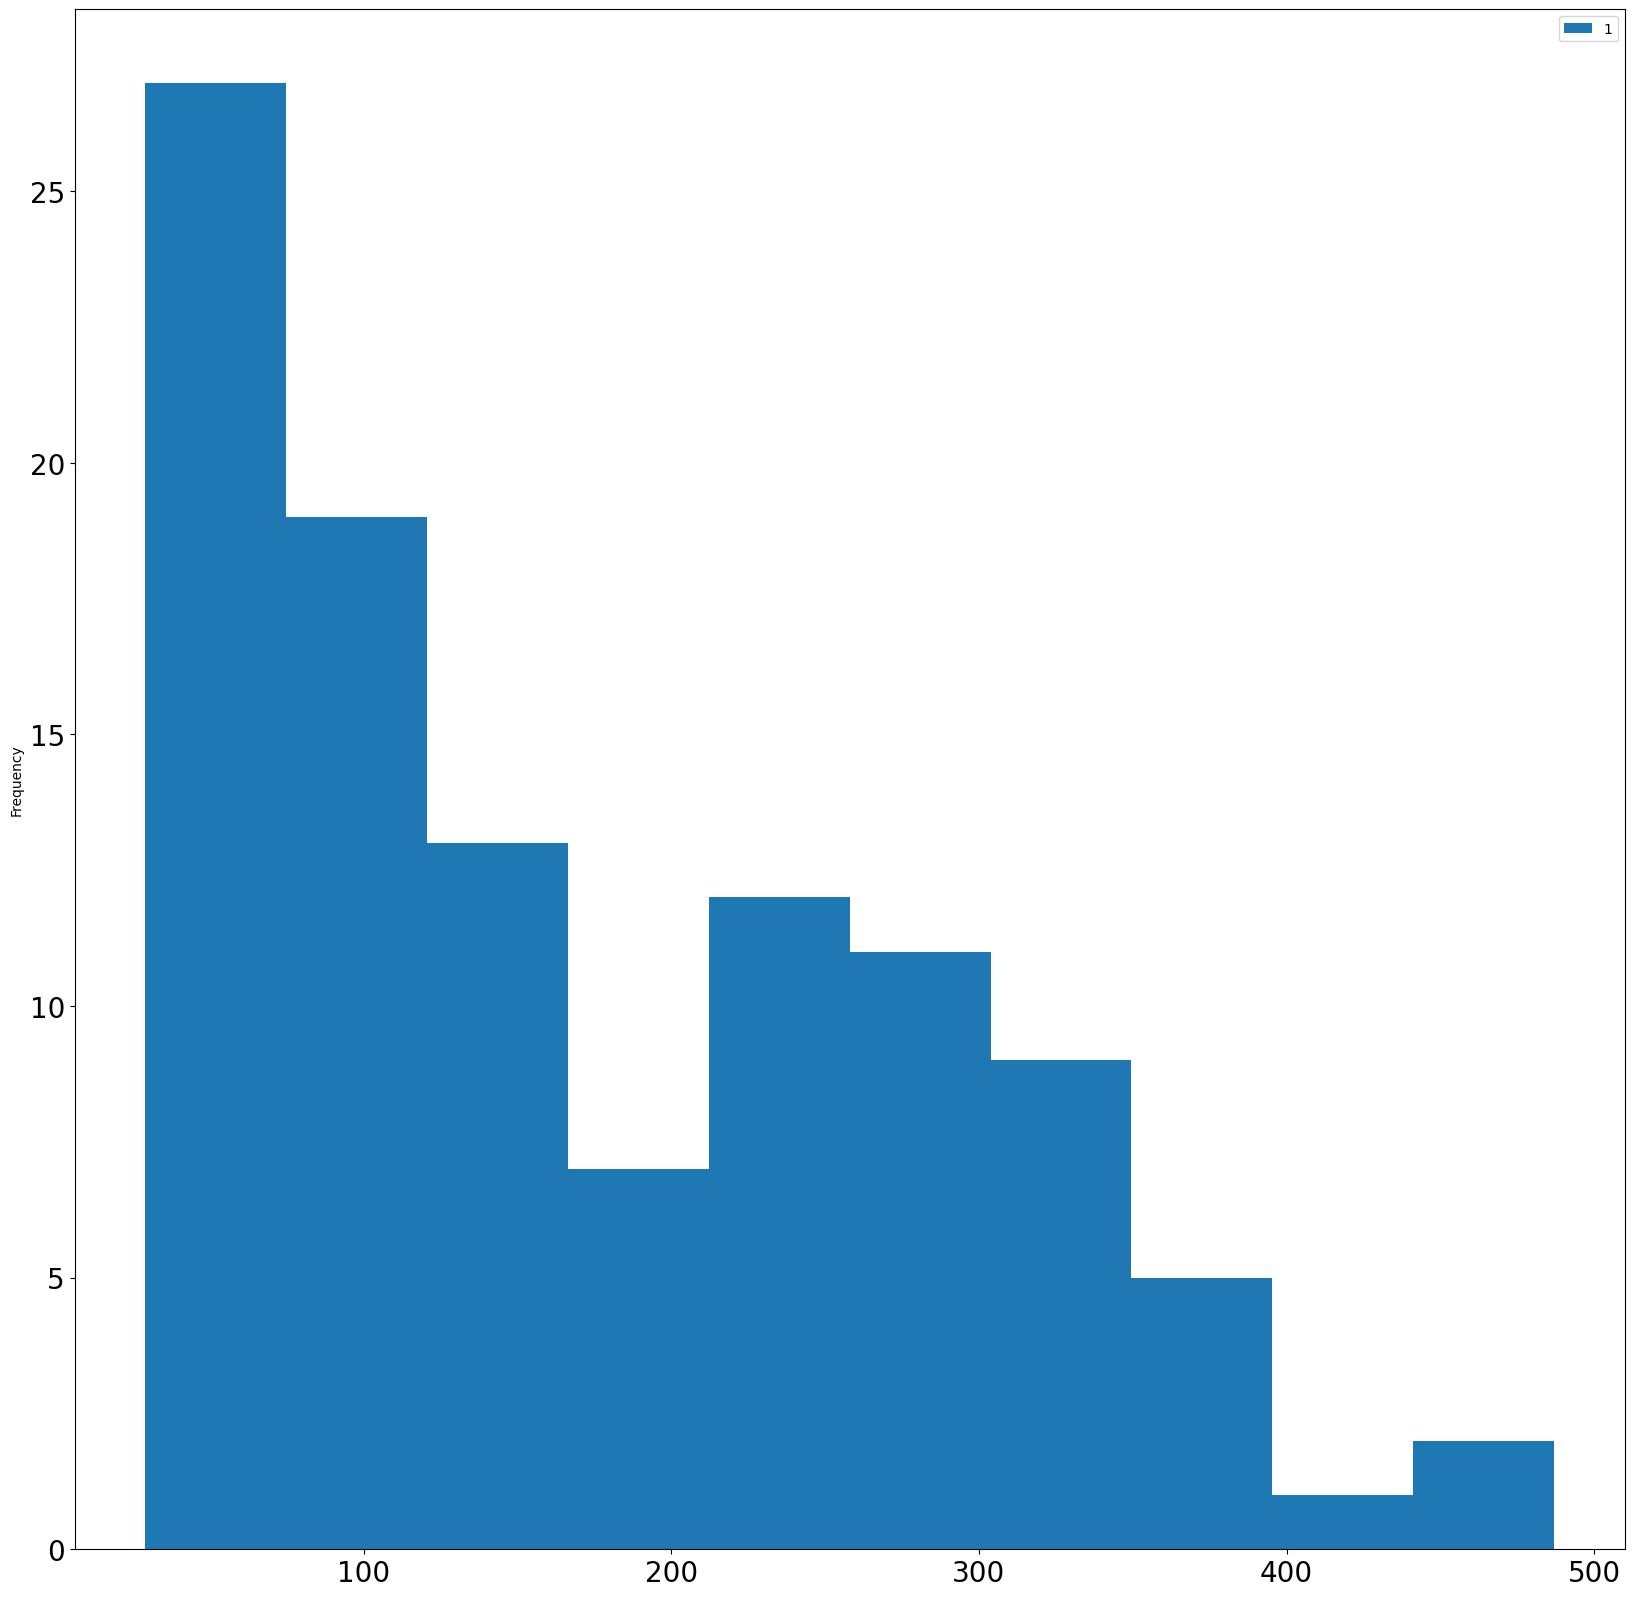

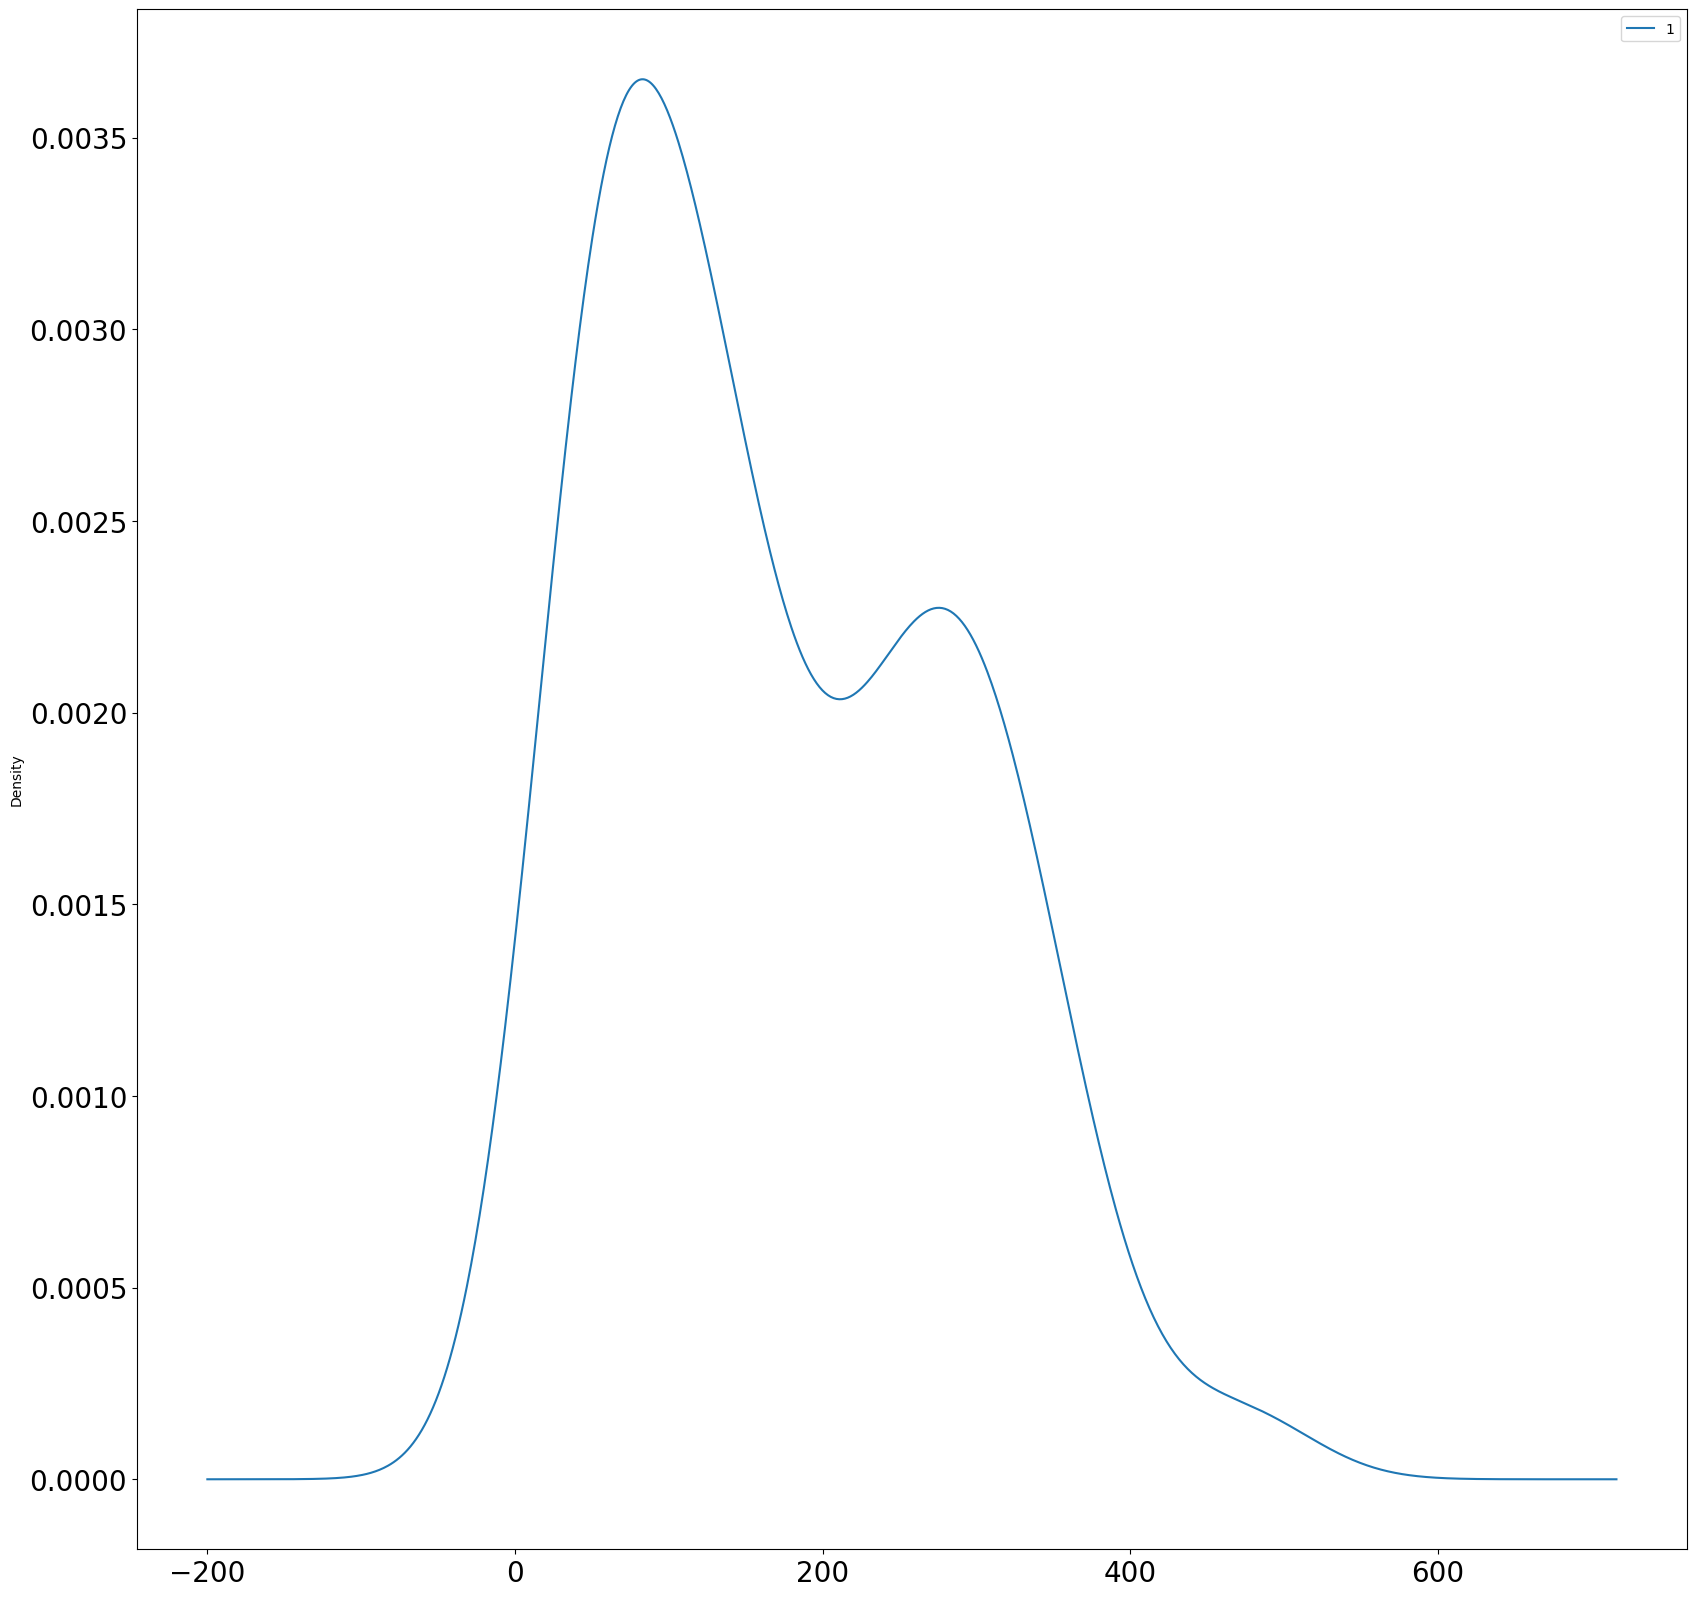

In [38]:
plt.figure(figsize=(20,20))
df.plot(kind='hist', figsize=(20,20), fontsize=20)
df.plot(kind='kde', figsize=(20,20), fontsize=20)
plt.show()

In [39]:
groups = df['1966':'1973'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
years['year'] = df['1966':'1973'].index.year
years['robberies'] = 0
for i in range(len(years)):
    years['robberies'][i] = df['1966':'1973'].iloc[i][1]
years

,year,robberies
0,1966,41
1,1966,39
2,1966,50
3,1966,40
4,1966,43
...,...,...
91,1973,401
92,1973,309
93,1973,328
94,1973,353


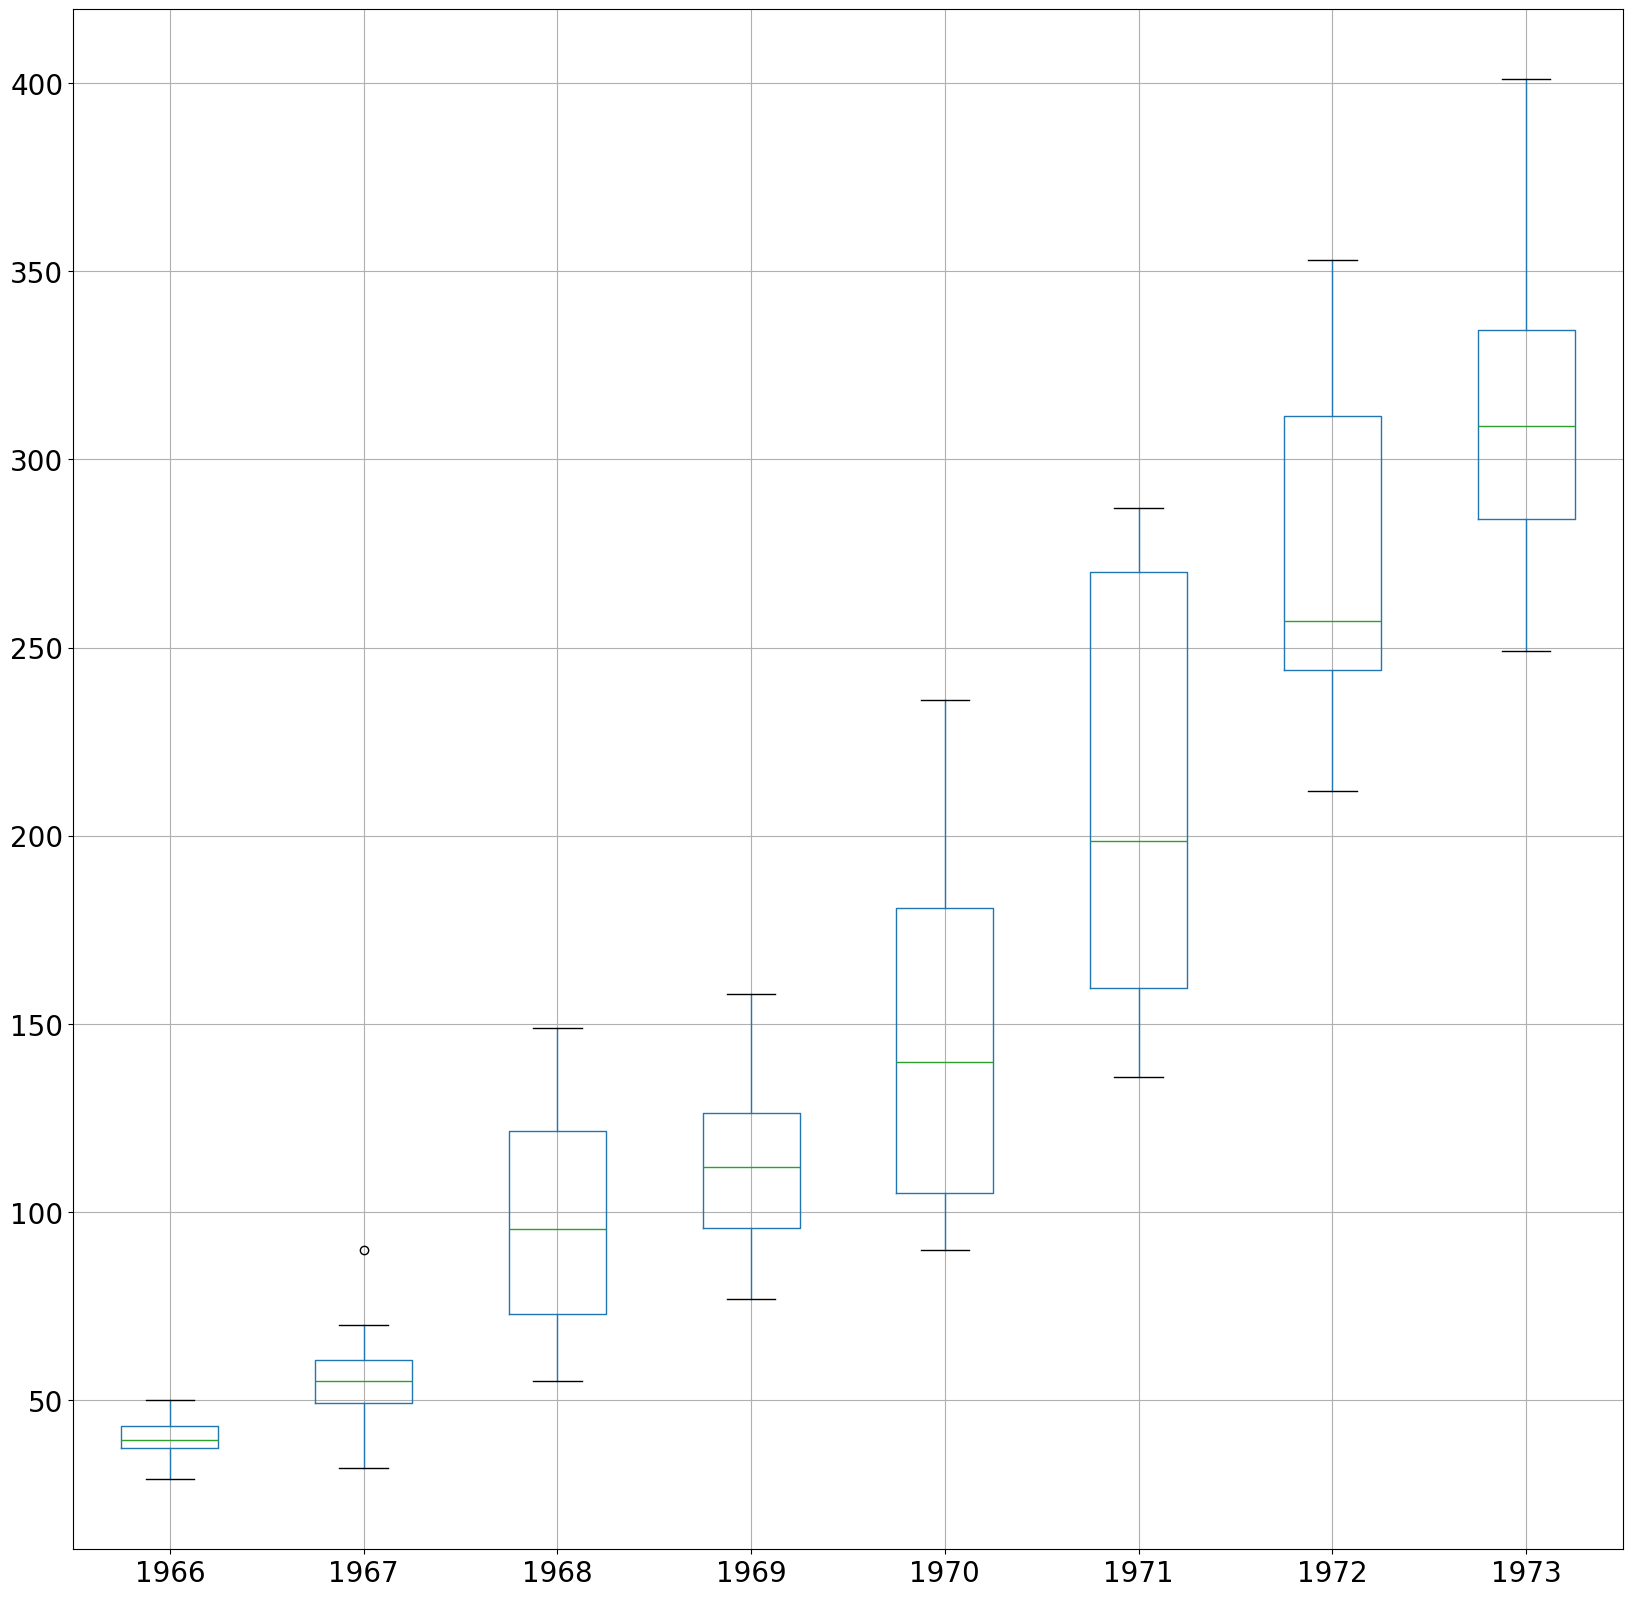

In [40]:
groups = df['1966':'1973'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values.flatten()
years.boxplot(figsize=(20,20), fontsize=20)
plt.show()

***ARIMA Models***

In [41]:
def difference(dataset):
    diff = list()
    for i in range(1,len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)

df = pd.read_csv('../output/robberies_dataset/train.csv', header=None, index_col=0, parse_dates=True)
X = df.values
#difference data
stationary = difference(X)
stationary.index = df.index[1:]
# Check if stationary
result = adfuller(stationary)
print(f'ADF Statistic:{result[0]}')
print(f'p-value:{result[1]}')
print(f'Critical values:')
for key, value in result[4].items():
    print(f'{key},{value:.3f}')

stationary.to_csv('../output/robberies_dataset/stationary.csv')

ADF Statistic:-3.9809463038611175
p-value:0.0015136348242122417
Critical values:
1%,-3.503
5%,-2.893
10%,-2.584


***AutoCorrelation function(ACF) and Partial AutoCorrelation Function(PACF)***

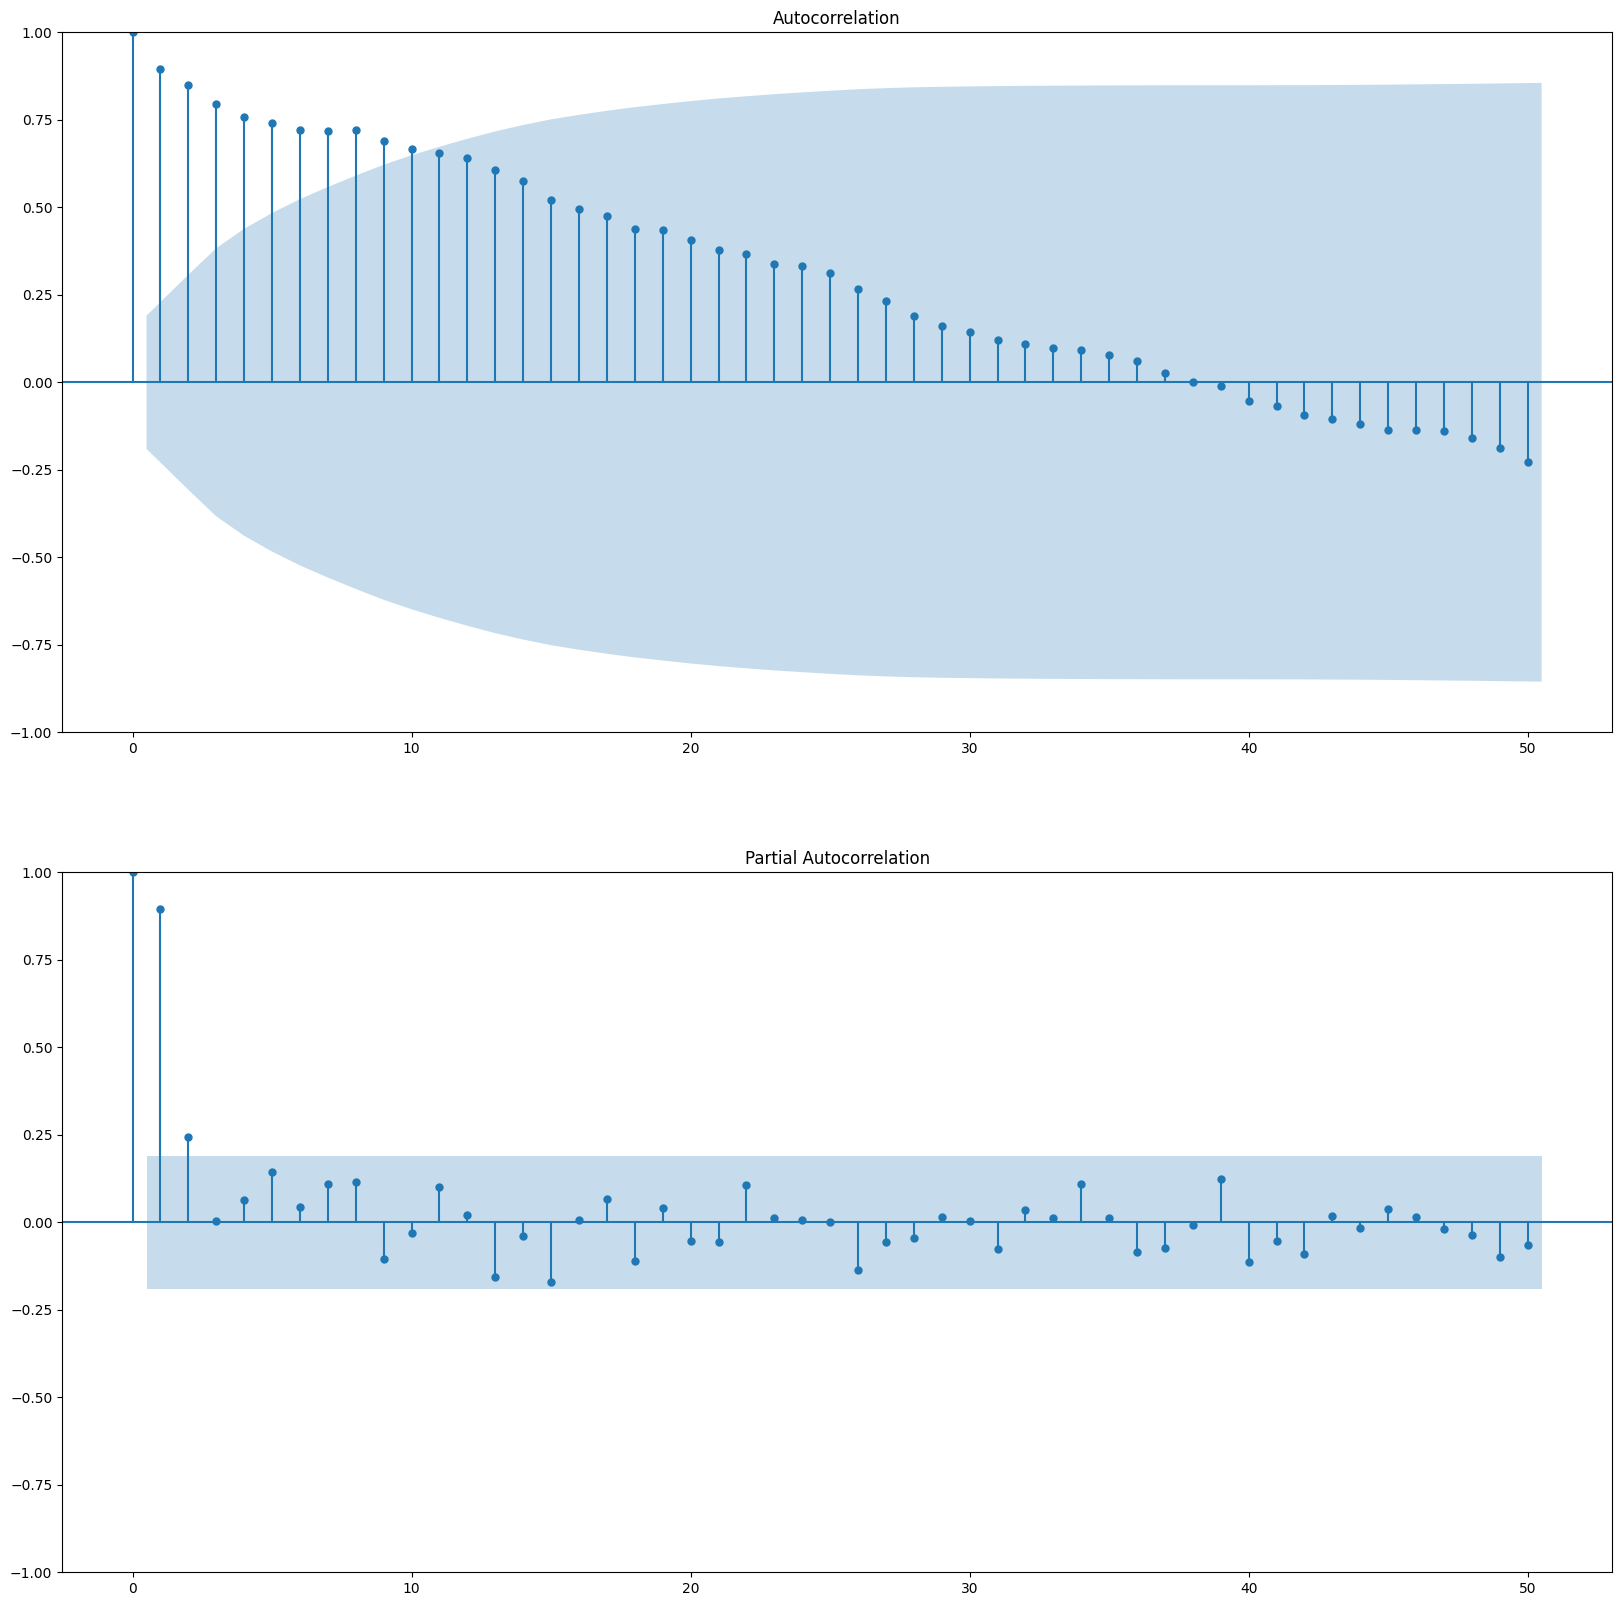

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(211)
plot_acf(df,lags=50,ax=plt.gca())
plt.subplot(212)
plot_pacf(df, lags= 50, ax=plt.gca())
plt.show()

The ACF shows a significant lag for 10-11 months.
    
The PACF shows a significant lag for perhaps 2 months.
    
Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of
AR and MA.

A good starting point for the p and q values are 11 and 2.


In [62]:
X = X.astype('float32')
train_size = int(len(X)*0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    model = ARIMA(history, order =(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print(f'Predicted: {yhat}, Expected: {obs}')
rmse = sqrt(mean_squared_error(test, predictions))
print(f'RMSE:{rmse:.3f}')


Predicted: 99.92251101518008, Expected: [125.]
Predicted: 116.44194337329411, Expected: [155.]
Predicted: 139.96228644658703, Expected: [190.]
Predicted: 176.9329722433411, Expected: [236.]
Predicted: 232.85149340974078, Expected: [189.]
Predicted: 184.69696982412808, Expected: [174.]
Predicted: 180.7052276276911, Expected: [178.]
Predicted: 179.87256815566016, Expected: [136.]
Predicted: 141.09782685980042, Expected: [161.]
Predicted: 166.17265068828456, Expected: [171.]
Predicted: 167.00513881135169, Expected: [149.]
Predicted: 150.6564967678197, Expected: [184.]
Predicted: 182.31438343596326, Expected: [155.]
Predicted: 154.21307388430964, Expected: [276.]
Predicted: 245.21422766609146, Expected: [224.]
Predicted: 225.90227330940806, Expected: [213.]
Predicted: 216.86746295671466, Expected: [279.]
Predicted: 258.69791487392087, Expected: [268.]
Predicted: 263.3771917895394, Expected: [287.]
Predicted: 279.9446562684423, Expected: [238.]
Predicted: 251.48470749330582, Expected: [213.

p: 0 to 12.

d: 0 to 3.

q: 0 to 12.

This is (13 ×4 ×13), or 676, runs of the test harness and will take some time to execute.


In [63]:
def evaluate_arima(X, arima_order):
    X = X.astype('float32')
    train_size = int(len(X)*0.50)
    train, test = X[0:train_size],X[train_size:]
    history = [x for x in train]
    #predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [64]:
def evaluate_models(df, p_values, d_values, q_values):
    df = df.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima(df, order)
                    if rmse<best_score:
                        best_score, best_cfg = rmse,order
                    print(f'ARIMA: {order} RMSE:{rmse}')
                except:
                    continue
    print(f'Best ARIMA:{best_cfg}, RMSE:{best_score}')

In [66]:
p_values = range(0,13)
d_values = range(0,4)
q_values = range(0,13)
evaluate_models(df.values, p_values, d_values, q_values)

ARIMA: (0, 0, 0) RMSE:154.96210608085133
ARIMA: (0, 0, 1) RMSE:99.3542548749939
ARIMA: (0, 0, 2) RMSE:92.07083831353691
ARIMA: (0, 0, 3) RMSE:72.27069682167452
ARIMA: (0, 0, 4) RMSE:72.1360976732729
ARIMA: (0, 0, 5) RMSE:68.59118884603824
ARIMA: (0, 0, 6) RMSE:67.38451669511902
ARIMA: (0, 0, 7) RMSE:62.68746586489045
ARIMA: (0, 0, 8) RMSE:66.32311680474412
ARIMA: (0, 0, 9) RMSE:59.718674060923355
ARIMA: (0, 0, 10) RMSE:59.25868949533508
ARIMA: (0, 0, 11) RMSE:65.67719617798967
ARIMA: (0, 0, 12) RMSE:61.78343147942972
ARIMA: (0, 1, 0) RMSE:51.84356003382804
ARIMA: (0, 1, 1) RMSE:50.71749438554965
ARIMA: (0, 1, 2) RMSE:51.115481374661215
ARIMA: (0, 1, 3) RMSE:52.0582402342761
ARIMA: (0, 1, 4) RMSE:52.6107561840889
ARIMA: (0, 1, 5) RMSE:53.97592248509389
ARIMA: (0, 1, 6) RMSE:53.79238488144648
ARIMA: (0, 1, 7) RMSE:53.60441652690325
ARIMA: (0, 1, 8) RMSE:53.69471226440486
ARIMA: (0, 1, 9) RMSE:55.04267605181741
ARIMA: (0, 1, 10) RMSE:57.65846800099108
ARIMA: (0, 1, 11) RMSE:56.50338680715

ARIMA: (0, 0, 0) RMSE:154.96210608085133
ARIMA: (0, 0, 1) RMSE:99.3542548749939
ARIMA: (0, 0, 2) RMSE:92.07083831353691
ARIMA: (0, 0, 3) RMSE:72.27069682167452
ARIMA: (0, 0, 4) RMSE:72.1360976732729
ARIMA: (0, 0, 5) RMSE:68.59118884603824
ARIMA: (0, 0, 6) RMSE:67.38451669511902
ARIMA: (0, 0, 7) RMSE:62.68746586489045
ARIMA: (0, 0, 8) RMSE:66.32311680474412
ARIMA: (0, 0, 9) RMSE:59.718674060923355
ARIMA: (0, 0, 10) RMSE:59.25868949533508
ARIMA: (0, 0, 11) RMSE:65.67719617798967
ARIMA: (0, 0, 12) RMSE:61.78343147942972
ARIMA: (0, 1, 0) RMSE:51.84356003382804
ARIMA: (0, 1, 1) RMSE:50.71749438554965
ARIMA: (0, 1, 2) RMSE:51.115481374661215
ARIMA: (0, 1, 3) RMSE:52.0582402342761
ARIMA: (0, 1, 4) RMSE:52.6107561840889
ARIMA: (0, 1, 5) RMSE:53.97592248509389
ARIMA: (0, 1, 6) RMSE:53.79238488144648
ARIMA: (0, 1, 7) RMSE:53.60441652690325
ARIMA: (0, 1, 8) RMSE:53.69471226440486
ARIMA: (0, 1, 9) RMSE:55.04267605181741
ARIMA: (0, 1, 10) RMSE:57.65846800099108
ARIMA: (0, 1, 11) RMSE:56.50338680715479
ARIMA: (0, 1, 12) RMSE:55.20394984799874
ARIMA: (0, 2, 0) RMSE:80.32070153042612
ARIMA: (0, 2, 1) RMSE:51.84514281959531
ARIMA: (0, 2, 2) RMSE:50.45403380045398
ARIMA: (0, 2, 3) RMSE:50.401311300719016
ARIMA: (0, 2, 4) RMSE:50.85895890987948
ARIMA: (0, 2, 5) RMSE:51.00318699196598
ARIMA: (0, 2, 6) RMSE:52.744939760864796
ARIMA: (0, 2, 7) RMSE:52.50410045491098
ARIMA: (0, 2, 8) RMSE:53.6410581871239
ARIMA: (0, 2, 9) RMSE:52.85510547509767
ARIMA: (0, 2, 10) RMSE:53.59549890750608
ARIMA: (0, 2, 11) RMSE:56.77957132504171
ARIMA: (0, 2, 12) RMSE:57.35345557999551
ARIMA: (0, 3, 0) RMSE:136.69046425726876
ARIMA: (0, 3, 1) RMSE:80.80803600352863
ARIMA: (0, 3, 2) RMSE:53.417417939840675
ARIMA: (0, 3, 3) RMSE:51.45151116799951
ARIMA: (0, 3, 4) RMSE:51.62785368457445
ARIMA: (0, 3, 5) RMSE:53.19181385533453
ARIMA: (0, 3, 6) RMSE:53.476028910853465
ARIMA: (0, 3, 7) RMSE:58.3493681097248
ARIMA: (0, 3, 8) RMSE:55.472531974395714
ARIMA: (0, 3, 9) RMSE:54.32066952041276
ARIMA: (0, 3, 10) RMSE:57.855548425552456
ARIMA: (0, 3, 11) RMSE:56.57404274998401
ARIMA: (0, 3, 12) RMSE:59.85122007412264
ARIMA: (1, 0, 0) RMSE:53.244062132537735
ARIMA: (1, 0, 1) RMSE:51.63371799197174
ARIMA: (1, 0, 2) RMSE:51.95523508257703
ARIMA: (1, 0, 3) RMSE:52.97420959436726
ARIMA: (1, 0, 4) RMSE:53.56967067526351
ARIMA: (1, 0, 5) RMSE:54.852246068962444
ARIMA: (1, 0, 6) RMSE:54.6691475520835
ARIMA: (1, 0, 7) RMSE:54.53115175980578
ARIMA: (1, 0, 8) RMSE:54.32197618372766
ARIMA: (1, 0, 9) RMSE:56.504072817282506
ARIMA: (1, 0, 10) RMSE:58.91186638427558
ARIMA: (1, 0, 11) RMSE:58.80135965232592
ARIMA: (1, 0, 12) RMSE:53.63914659827865
ARIMA: (1, 1, 0) RMSE:50.783895471640996
ARIMA: (1, 1, 1) RMSE:50.36365839656982
ARIMA: (1, 1, 2) RMSE:51.698333421690265
ARIMA: (1, 1, 3) RMSE:52.24422290121758
ARIMA: (1, 1, 4) RMSE:52.54627397073092
ARIMA: (1, 1, 5) RMSE:53.922004278711775
ARIMA: (1, 1, 6) RMSE:54.00081109349196
ARIMA: (1, 1, 7) RMSE:53.78295633835306
ARIMA: (1, 1, 8) RMSE:54.56829936785607
ARIMA: (1, 1, 9) RMSE:55.40119254589152
ARIMA: (1, 1, 10) RMSE:56.74462233278932
ARIMA: (1, 1, 11) RMSE:57.403285546115775
ARIMA: (1, 1, 12) RMSE:56.78647939846868
ARIMA: (1, 2, 0) RMSE:68.24039783531792
ARIMA: (1, 2, 1) RMSE:50.64081215840329
ARIMA: (1, 2, 2) RMSE:52.2641868759897
ARIMA: (1, 2, 3) RMSE:50.49867035144122
ARIMA: (1, 2, 4) RMSE:51.02739086044848
ARIMA: (1, 2, 5) RMSE:51.60323129978857
ARIMA: (1, 2, 6) RMSE:51.97448535220359
ARIMA: (1, 2, 7) RMSE:53.617265363976806
ARIMA: (1, 2, 8) RMSE:52.253740695470356
ARIMA: (1, 2, 9) RMSE:53.18233459106193
ARIMA: (1, 2, 10) RMSE:54.86407789491799
ARIMA: (1, 2, 11) RMSE:55.96574233404327
ARIMA: (1, 2, 12) RMSE:56.885074652420464
ARIMA: (1, 3, 0) RMSE:106.14244820143003
ARIMA: (1, 3, 1) RMSE:68.71273541189876
ARIMA: (1, 3, 2) RMSE:52.877337666361456
ARIMA: (1, 3, 3) RMSE:53.288156476384714
ARIMA: (1, 3, 4) RMSE:51.51266338332027
ARIMA: (1, 3, 5) RMSE:51.62312081108289
ARIMA: (1, 3, 6) RMSE:52.6992460816283
ARIMA: (1, 3, 7) RMSE:52.869948206629246
ARIMA: (1, 3, 8) RMSE:54.63232723519347
ARIMA: (1, 3, 9) RMSE:53.928439633683396
ARIMA: (1, 3, 10) RMSE:54.16697946101713
ARIMA: (1, 3, 11) RMSE:55.887062178386934
ARIMA: (1, 3, 12) RMSE:57.52225610995093
ARIMA: (2, 0, 0) RMSE:52.100078235655815
ARIMA: (2, 0, 1) RMSE:52.332582502223296
ARIMA: (2, 0, 2) RMSE:52.49169628107143
ARIMA: (2, 0, 3) RMSE:52.90114087803231
ARIMA: (2, 0, 4) RMSE:53.76352514588562
ARIMA: (2, 0, 5) RMSE:54.93320923691786
ARIMA: (2, 0, 6) RMSE:56.1817092304465
ARIMA: (2, 0, 7) RMSE:56.45986114248368
ARIMA: (2, 0, 8) RMSE:56.773586323112404
ARIMA: (2, 0, 9) RMSE:56.65671070517643
ARIMA: (2, 0, 10) RMSE:61.92075162598574
ARIMA: (2, 0, 11) RMSE:61.43358209249243
ARIMA: (2, 0, 12) RMSE:56.375273491829674
ARIMA: (2, 1, 0) RMSE:51.20445153465077
ARIMA: (2, 1, 1) RMSE:52.05092713676084
ARIMA: (2, 1, 2) RMSE:54.18779969199581
ARIMA: (2, 1, 3) RMSE:52.68832781897907
ARIMA: (2, 1, 4) RMSE:52.79971155633859
ARIMA: (2, 1, 5) RMSE:53.30990010997094
ARIMA: (2, 1, 6) RMSE:53.82450010381018
ARIMA: (2, 1, 7) RMSE:57.001097334196146
ARIMA: (2, 1, 8) RMSE:55.11686597885576
ARIMA: (2, 1, 9) RMSE:55.62817539575366
ARIMA: (2, 1, 10) RMSE:56.790690265462565
ARIMA: (2, 1, 11) RMSE:55.64893697764902
ARIMA: (2, 1, 12) RMSE:56.5093589900443
ARIMA: (2, 2, 0) RMSE:61.00962954867632
ARIMA: (2, 2, 1) RMSE:50.848357947738165
ARIMA: (2, 2, 2) RMSE:50.95155656147202
ARIMA: (2, 2, 3) RMSE:51.07063405048155
ARIMA: (2, 2, 4) RMSE:53.90918511186576
ARIMA: (2, 2, 5) RMSE:52.55784901193163
ARIMA: (2, 2, 6) RMSE:50.69586923658679
ARIMA: (2, 2, 7) RMSE:51.599143718554345
ARIMA: (2, 2, 8) RMSE:54.257609922706735
ARIMA: (2, 2, 9) RMSE:55.32508803793787
ARIMA: (2, 2, 10) RMSE:56.27937661879962
ARIMA: (2, 2, 11) RMSE:55.804346167742494
ARIMA: (2, 2, 12) RMSE:59.98610011878124
ARIMA: (2, 3, 0) RMSE:86.87470065900915
ARIMA: (2, 3, 1) RMSE:61.45316382798156
ARIMA: (2, 3, 2) RMSE:51.479964558565584
ARIMA: (2, 3, 3) RMSE:52.32438882364831
ARIMA: (2, 3, 4) RMSE:53.981793320902526
ARIMA: (2, 3, 5) RMSE:52.12973622243321
ARIMA: (2, 3, 6) RMSE:65.35552736218764
ARIMA: (2, 3, 7) RMSE:52.66627290747569
ARIMA: (2, 3, 8) RMSE:54.49201640066886
ARIMA: (2, 3, 9) RMSE:55.97884935544099
ARIMA: (2, 3, 10) RMSE:57.24826577075753
ARIMA: (2, 3, 11) RMSE:57.59183159326485
ARIMA: (2, 3, 12) RMSE:2435.3355244712147
ARIMA: (3, 0, 0) RMSE:52.27536524349149
ARIMA: (3, 0, 1) RMSE:53.00272866381556
ARIMA: (3, 0, 2) RMSE:55.15561686038902
ARIMA: (3, 0, 3) RMSE:54.10239014815429
ARIMA: (3, 0, 4) RMSE:53.506042839879996
ARIMA: (3, 0, 5) RMSE:53.05126714161539
ARIMA: (3, 0, 6) RMSE:52.84124533497959
ARIMA: (3, 0, 7) RMSE:54.322381658996925
ARIMA: (3, 0, 8) RMSE:56.617414940366274
ARIMA: (3, 0, 9) RMSE:57.12687440310373
ARIMA: (3, 0, 10) RMSE:56.52218725710846
ARIMA: (3, 0, 11) RMSE:59.91046207215222
ARIMA: (3, 0, 12) RMSE:58.9332347651764
ARIMA: (3, 1, 0) RMSE:52.42066539418668
ARIMA: (3, 1, 1) RMSE:52.47892280162077
ARIMA: (3, 1, 2) RMSE:52.48468683878234
ARIMA: (3, 1, 3) RMSE:52.92783222335301
ARIMA: (3, 1, 4) RMSE:52.01627276347476
ARIMA: (3, 1, 5) RMSE:51.83591298797607
ARIMA: (3, 1, 6) RMSE:51.95937914309249
ARIMA: (3, 1, 7) RMSE:53.251435161295795
ARIMA: (3, 1, 8) RMSE:56.61925542175548
ARIMA: (3, 1, 9) RMSE:57.51984284014356
ARIMA: (3, 1, 10) RMSE:56.45360367946766
ARIMA: (3, 1, 11) RMSE:58.146905916597184
ARIMA: (3, 1, 12) RMSE:55.16145947252234
ARIMA: (3, 2, 0) RMSE:60.04990603216413
ARIMA: (3, 2, 1) RMSE:52.3037247647138
ARIMA: (3, 2, 2) RMSE:60.15908873206731
ARIMA: (3, 2, 3) RMSE:53.638446288259516
ARIMA: (3, 2, 4) RMSE:56.16230566706302
ARIMA: (3, 2, 5) RMSE:50.9125252273908
ARIMA: (3, 2, 6) RMSE:51.219224166206104
ARIMA: (3, 2, 7) RMSE:52.055212852438885
ARIMA: (3, 2, 8) RMSE:53.13209285233115
ARIMA: (3, 2, 9) RMSE:55.22148318553434
ARIMA: (3, 2, 10) RMSE:57.49667446135838
ARIMA: (3, 2, 11) RMSE:54.5264072023796
ARIMA: (3, 2, 12) RMSE:57.23245729494031
ARIMA: (3, 3, 0) RMSE:83.21498501656666
ARIMA: (3, 3, 1) RMSE:60.453979469231946
ARIMA: (3, 3, 2) RMSE:60.46697352758911
ARIMA: (3, 3, 3) RMSE:51.99436260695377
ARIMA: (3, 3, 4) RMSE:52.729121752740014
ARIMA: (3, 3, 6) RMSE:51.90164938911151
ARIMA: (3, 3, 7) RMSE:53.04943607507717
ARIMA: (3, 3, 8) RMSE:53.45230325442488
ARIMA: (3, 3, 9) RMSE:52.850583491239604
ARIMA: (3, 3, 10) RMSE:57.2484355106274
ARIMA: (3, 3, 11) RMSE:55.86244095003014
ARIMA: (3, 3, 12) RMSE:3507.8780691049024
ARIMA: (4, 0, 0) RMSE:53.36460192159487
ARIMA: (4, 0, 1) RMSE:53.43234589519246
ARIMA: (4, 0, 2) RMSE:53.162163902068535
ARIMA: (4, 0, 3) RMSE:55.067621923872174
ARIMA: (4, 0, 4) RMSE:54.21859141882374
ARIMA: (4, 0, 5) RMSE:54.22228873799675
ARIMA: (4, 0, 6) RMSE:55.00930745634535
ARIMA: (4, 0, 7) RMSE:54.069580208560225
ARIMA: (4, 0, 8) RMSE:58.27644724110534
ARIMA: (4, 0, 9) RMSE:57.782324359129234
ARIMA: (4, 0, 10) RMSE:56.662728432079895
ARIMA: (4, 0, 11) RMSE:62.98468338398076
ARIMA: (4, 0, 12) RMSE:58.97830199454773
ARIMA: (4, 1, 0) RMSE:53.12663463748013
ARIMA: (4, 1, 1) RMSE:53.17845278623168
ARIMA: (4, 1, 3) RMSE:53.51094563033087
ARIMA: (4, 1, 4) RMSE:52.791477590334345
ARIMA: (4, 1, 5) RMSE:54.24690534768164
ARIMA: (4, 1, 6) RMSE:54.44931449047352
ARIMA: (4, 1, 7) RMSE:57.5043883926556
ARIMA: (4, 1, 8) RMSE:57.57759084590299
ARIMA: (4, 1, 9) RMSE:57.42835269476244
ARIMA: (4, 1, 10) RMSE:57.33507982264646
ARIMA: (4, 1, 11) RMSE:63.544099387426904
ARIMA: (4, 1, 12) RMSE:53.57982590340282
ARIMA: (4, 2, 0) RMSE:55.98605131847755
ARIMA: (4, 2, 1) RMSE:52.554372656109265
ARIMA: (4, 2, 2) RMSE:52.78621099698785
ARIMA: (4, 2, 3) RMSE:51.795446374641884
ARIMA: (4, 2, 4) RMSE:52.158601675786024
ARIMA: (4, 2, 5) RMSE:53.29436565412171
ARIMA: (4, 2, 6) RMSE:52.42967945826746
ARIMA: (4, 2, 7) RMSE:53.47277876248725
ARIMA: (4, 2, 8) RMSE:53.14420976096628
ARIMA: (4, 2, 9) RMSE:54.026190699769586
ARIMA: (4, 2, 10) RMSE:54.16316349099292
ARIMA: (4, 2, 11) RMSE:55.703133116463725
ARIMA: (4, 3, 0) RMSE:70.55219803380267
ARIMA: (4, 3, 1) RMSE:56.38355701702512
ARIMA: (4, 3, 2) RMSE:53.8185187941877
ARIMA: (4, 3, 3) RMSE:55.8693603545268
ARIMA: (4, 3, 4) RMSE:53.45447753595206
ARIMA: (4, 3, 5) RMSE:53.46553012294718
ARIMA: (4, 3, 6) RMSE:55.150746715070106
ARIMA: (4, 3, 7) RMSE:53.52209583935218
ARIMA: (4, 3, 8) RMSE:54.62315870899265
ARIMA: (4, 3, 9) RMSE:53.00638994711037
ARIMA: (4, 3, 10) RMSE:53.428770385860744
ARIMA: (4, 3, 11) RMSE:55.047430512959735
ARIMA: (4, 3, 12) RMSE:4375.992106049714
ARIMA: (5, 0, 0) RMSE:54.03531272241052
ARIMA: (5, 0, 1) RMSE:53.86977573868016
ARIMA: (5, 0, 2) RMSE:53.58626349335309
ARIMA: (5, 0, 3) RMSE:51.46571341510485
ARIMA: (5, 0, 4) RMSE:55.31512392393166
ARIMA: (5, 0, 5) RMSE:54.37533582910823
ARIMA: (5, 0, 6) RMSE:52.95618024848373
ARIMA: (5, 0, 7) RMSE:57.748292839887
ARIMA: (5, 0, 8) RMSE:56.53492108527992
ARIMA: (5, 0, 9) RMSE:58.67257137802686
ARIMA: (5, 0, 10) RMSE:57.757169381013654
ARIMA: (5, 0, 11) RMSE:57.75290119120567
ARIMA: (5, 0, 12) RMSE:58.51716956443778
ARIMA: (5, 1, 0) RMSE:53.20755472076131
ARIMA: (5, 1, 1) RMSE:53.28059895818572
ARIMA: (5, 1, 2) RMSE:53.059027406484475
ARIMA: (5, 1, 3) RMSE:52.04296421359306
ARIMA: (5, 1, 4) RMSE:51.659155296013964
ARIMA: (5, 1, 5) RMSE:53.41052882103361
ARIMA: (5, 1, 6) RMSE:53.20375183786777
ARIMA: (5, 1, 7) RMSE:56.306997436637836
ARIMA: (5, 1, 8) RMSE:55.47664862826471
ARIMA: (5, 1, 9) RMSE:55.610483246104586
ARIMA: (5, 1, 10) RMSE:56.388535025964174
ARIMA: (5, 1, 11) RMSE:53.126881441377385
ARIMA: (5, 1, 12) RMSE:52.91210343726364
ARIMA: (5, 2, 0) RMSE:57.06055724335953
ARIMA: (5, 2, 1) RMSE:52.722368596996944
ARIMA: (5, 2, 2) RMSE:53.568437363371665
ARIMA: (5, 2, 3) RMSE:52.887282384717075
ARIMA: (5, 2, 4) RMSE:51.19044260544028
ARIMA: (5, 2, 5) RMSE:53.783146235939874
ARIMA: (5, 2, 6) RMSE:50.14038957440945
ARIMA: (5, 2, 7) RMSE:54.78652901515008
ARIMA: (5, 2, 8) RMSE:55.19827068047221
ARIMA: (5, 2, 9) RMSE:53.35724797371954
ARIMA: (5, 2, 10) RMSE:56.566751312833446
ARIMA: (5, 2, 11) RMSE:56.14595914843618
ARIMA: (5, 2, 12) RMSE:56.70684918587401
ARIMA: (5, 3, 0) RMSE:66.07124867712999
ARIMA: (5, 3, 1) RMSE:57.49388960859268
ARIMA: (5, 3, 2) RMSE:57.26560804015358
ARIMA: (5, 3, 3) RMSE:59.484601786042724
ARIMA: (5, 3, 4) RMSE:6654.2345580227
ARIMA: (5, 3, 5) RMSE:54.67988078315649
ARIMA: (5, 3, 6) RMSE:56.315071509733095
ARIMA: (5, 3, 7) RMSE:51.52319525458586
ARIMA: (5, 3, 8) RMSE:50.335377236390954
ARIMA: (5, 3, 10) RMSE:56.96765571096309
ARIMA: (5, 3, 12) RMSE:5145.987961902074
ARIMA: (6, 0, 0) RMSE:54.14296835713028
ARIMA: (6, 0, 1) RMSE:54.00249920036586
ARIMA: (6, 0, 2) RMSE:54.12411814378562
ARIMA: (6, 0, 3) RMSE:52.64810765660585
ARIMA: (6, 0, 4) RMSE:54.80194720997855
ARIMA: (6, 0, 5) RMSE:55.08338189727477
ARIMA: (6, 0, 6) RMSE:53.98146070151786
ARIMA: (6, 0, 7) RMSE:57.54113986111474
ARIMA: (6, 0, 8) RMSE:57.588140681931144
ARIMA: (6, 0, 9) RMSE:58.794131874099435
ARIMA: (6, 0, 10) RMSE:58.588231240889726
ARIMA: (6, 0, 11) RMSE:59.445940785953475
ARIMA: (6, 0, 12) RMSE:58.635334989915016
ARIMA: (6, 1, 0) RMSE:53.1996383624301
ARIMA: (6, 1, 1) RMSE:52.64114629068021
ARIMA: (6, 1, 2) RMSE:52.59297013297099
ARIMA: (6, 1, 3) RMSE:51.59908755723631
ARIMA: (6, 1, 5) RMSE:52.517900621976175
ARIMA: (6, 1, 6) RMSE:51.507245590738016
ARIMA: (6, 1, 7) RMSE:53.04181124626486
ARIMA: (6, 1, 8) RMSE:55.076845124495264
ARIMA: (6, 1, 9) RMSE:58.21337796267615
ARIMA: (6, 1, 10) RMSE:57.6185439955584
ARIMA: (6, 1, 11) RMSE:55.60039712072035
ARIMA: (6, 1, 12) RMSE:56.91155430901341
ARIMA: (6, 2, 0) RMSE:57.98071592167114
ARIMA: (6, 2, 1) RMSE:52.54708071640545
ARIMA: (6, 2, 2) RMSE:52.91972675712764
ARIMA: (6, 2, 3) RMSE:54.15114847949535
ARIMA: (6, 2, 4) RMSE:53.4708391550536
ARIMA: (6, 2, 5) RMSE:54.23736228981627
ARIMA: (6, 2, 6) RMSE:53.03199804955119
ARIMA: (6, 2, 7) RMSE:54.26022875245797
ARIMA: (6, 2, 8) RMSE:53.69427621796935
ARIMA: (6, 2, 9) RMSE:55.83442911783665
ARIMA: (6, 2, 10) RMSE:57.2358729525086
ARIMA: (6, 2, 11) RMSE:57.71584548060544
ARIMA: (6, 3, 0) RMSE:66.35304783410525
ARIMA: (6, 3, 1) RMSE:58.45050632617959
ARIMA: (6, 3, 2) RMSE:58.08062972671339
ARIMA: (6, 3, 3) RMSE:59.00530698793228
ARIMA: (6, 3, 4) RMSE:54.988708039239285
ARIMA: (6, 3, 5) RMSE:55.53595287010592
ARIMA: (6, 3, 6) RMSE:54.41205837158402
ARIMA: (6, 3, 7) RMSE:52.45046319774563
ARIMA: (6, 3, 8) RMSE:55.81501669518249
ARIMA: (6, 3, 9) RMSE:57.12408645883609
ARIMA: (6, 3, 10) RMSE:54.982120795928964
ARIMA: (6, 3, 11) RMSE:2435.1995081748023
ARIMA: (7, 0, 0) RMSE:54.1371188236616
ARIMA: (7, 0, 1) RMSE:53.434441724616306
ARIMA: (7, 0, 2) RMSE:52.635916193977884
ARIMA: (7, 0, 3) RMSE:53.51389852655652
ARIMA: (7, 0, 4) RMSE:53.414595371313595
ARIMA: (7, 0, 5) RMSE:54.2257214745892
ARIMA: (7, 0, 6) RMSE:53.95132387935449
ARIMA: (7, 0, 7) RMSE:56.764972109223216
ARIMA: (7, 0, 8) RMSE:57.138341542089215
ARIMA: (7, 0, 9) RMSE:59.597147230362474
ARIMA: (7, 0, 10) RMSE:57.933583432890735
ARIMA: (7, 0, 11) RMSE:56.108561989456454
ARIMA: (7, 0, 12) RMSE:58.9888508419673
ARIMA: (7, 1, 0) RMSE:52.456605045725304
ARIMA: (7, 1, 1) RMSE:53.21781664638283
ARIMA: (7, 1, 2) RMSE:54.21514439794564
ARIMA: (7, 1, 3) RMSE:53.38514701057259
ARIMA: (7, 1, 4) RMSE:53.78429434641576
ARIMA: (7, 1, 5) RMSE:52.59265345778666
ARIMA: (7, 1, 6) RMSE:51.28278082041774
ARIMA: (7, 1, 7) RMSE:54.188343927698426
ARIMA: (7, 1, 8) RMSE:54.53753010985293
ARIMA: (7, 1, 9) RMSE:54.72371087695017
ARIMA: (7, 1, 10) RMSE:56.08344764811666
ARIMA: (7, 1, 11) RMSE:55.73298031849634
ARIMA: (7, 1, 12) RMSE:56.83833127922425
ARIMA: (7, 2, 0) RMSE:56.48176292498532
ARIMA: (7, 2, 1) RMSE:51.470495544059055
ARIMA: (7, 2, 2) RMSE:53.937777782805924
ARIMA: (7, 2, 3) RMSE:53.71701891468405
ARIMA: (7, 2, 4) RMSE:52.30271949993731
ARIMA: (7, 2, 5) RMSE:52.47709936410062
ARIMA: (7, 2, 6) RMSE:53.67366869705914
ARIMA: (7, 2, 7) RMSE:53.53656503362444
ARIMA: (7, 2, 8) RMSE:57.204694016140174
ARIMA: (7, 2, 10) RMSE:57.0047768613487
ARIMA: (7, 2, 11) RMSE:56.03610552750893
ARIMA: (7, 3, 1) RMSE:56.9559015449523
ARIMA: (7, 3, 2) RMSE:21846304.701508634
ARIMA: (7, 3, 3) RMSE:56.442061298251716
ARIMA: (7, 3, 4) RMSE:55.39172407533112
ARIMA: (7, 3, 5) RMSE:55.926210706663944
ARIMA: (7, 3, 6) RMSE:59.58704397837587
ARIMA: (7, 3, 7) RMSE:55.65066100109577
ARIMA: (7, 3, 8) RMSE:53.53256047454996
ARIMA: (8, 0, 0) RMSE:53.272825403646124
ARIMA: (8, 0, 1) RMSE:53.56473438817739
ARIMA: (8, 0, 2) RMSE:53.93074289132752
ARIMA: (8, 0, 3) RMSE:54.524121425711535
ARIMA: (8, 0, 4) RMSE:55.14179158203724
ARIMA: (8, 0, 5) RMSE:55.34728638249749
ARIMA: (8, 0, 6) RMSE:55.55070556891994
ARIMA: (8, 0, 7) RMSE:53.302577726261546
ARIMA: (8, 0, 8) RMSE:56.94979379983242
ARIMA: (8, 0, 9) RMSE:56.68090539227396
ARIMA: (8, 0, 10) RMSE:57.20389398169969
ARIMA: (8, 0, 11) RMSE:57.35173897520132
ARIMA: (8, 0, 12) RMSE:56.557247882673146
ARIMA: (8, 1, 0) RMSE:52.92167757485092
ARIMA: (8, 1, 1) RMSE:53.77752888410858
ARIMA: (8, 1, 2) RMSE:54.892317315644256
ARIMA: (8, 1, 3) RMSE:53.21507480715372
ARIMA: (8, 1, 4) RMSE:52.55189577013818
ARIMA: (8, 1, 5) RMSE:54.84975366117872
ARIMA: (8, 1, 6) RMSE:51.6925066248058
ARIMA: (8, 1, 7) RMSE:53.907159775250854
ARIMA: (8, 1, 8) RMSE:57.323363584542726
ARIMA: (8, 1, 9) RMSE:54.675201841469814
ARIMA: (8, 1, 10) RMSE:58.45533496587253
ARIMA: (8, 1, 11) RMSE:58.85481405375481
ARIMA: (8, 2, 0) RMSE:57.0887773734804
ARIMA: (8, 2, 1) RMSE:52.195862067511236
ARIMA: (8, 2, 2) RMSE:53.47335908692646
ARIMA: (8, 2, 3) RMSE:54.10730810334069
ARIMA: (8, 2, 4) RMSE:53.89802427098993
ARIMA: (8, 2, 5) RMSE:52.79576491116942
ARIMA: (8, 2, 6) RMSE:53.085385409906806
ARIMA: (8, 2, 7) RMSE:54.54429564538276
ARIMA: (8, 2, 8) RMSE:56.83257901752997
ARIMA: (8, 2, 9) RMSE:56.137234205760834
ARIMA: (8, 2, 10) RMSE:54.99996851616504
ARIMA: (8, 2, 11) RMSE:54.11496569376583
ARIMA: (8, 3, 0) RMSE:62.67413375398352
ARIMA: (8, 3, 1) RMSE:57.71557256555927
ARIMA: (8, 3, 2) RMSE:59.160458275502386
ARIMA: (8, 3, 3) RMSE:60.59856553761184
ARIMA: (8, 3, 4) RMSE:57.40207144204644
ARIMA: (8, 3, 5) RMSE:55.92249737691592
ARIMA: (8, 3, 6) RMSE:54.21600296852515
ARIMA: (8, 3, 7) RMSE:56.54375024997704
ARIMA: (8, 3, 8) RMSE:56.644321864102906
ARIMA: (8, 3, 9) RMSE:57.9894264655103
ARIMA: (8, 3, 10) RMSE:59.048935040557524
ARIMA: (8, 3, 11) RMSE:4375.970169408301
ARIMA: (8, 3, 12) RMSE:6757.156662426927
ARIMA: (9, 0, 0) RMSE:53.920589464931645
ARIMA: (9, 0, 1) RMSE:54.53963530645508
ARIMA: (9, 0, 2) RMSE:55.26198192177179
ARIMA: (9, 0, 3) RMSE:54.782132127770325
ARIMA: (9, 0, 4) RMSE:55.06400310019268
ARIMA: (9, 0, 5) RMSE:54.900560093042216
ARIMA: (9, 0, 6) RMSE:56.51931754739876
ARIMA: (9, 0, 7) RMSE:54.05697590584862
ARIMA: (9, 0, 8) RMSE:55.93882111209459
ARIMA: (9, 0, 9) RMSE:55.75936564203714
ARIMA: (9, 0, 10) RMSE:59.2497975725327
ARIMA: (9, 0, 11) RMSE:58.92948489704648
ARIMA: (9, 0, 12) RMSE:59.17336170911624
ARIMA: (9, 1, 0) RMSE:53.778132697919254
ARIMA: (9, 1, 1) RMSE:53.94365718818898
ARIMA: (9, 1, 2) RMSE:52.364861048054834
ARIMA: (9, 1, 3) RMSE:54.35041439647501
ARIMA: (9, 1, 4) RMSE:52.649441856490164
ARIMA: (9, 1, 5) RMSE:52.7749654001138
ARIMA: (9, 1, 6) RMSE:52.95928000998097
ARIMA: (9, 1, 7) RMSE:54.851909403207465
ARIMA: (9, 1, 8) RMSE:54.302109046841416
ARIMA: (9, 1, 10) RMSE:55.2428061352309
ARIMA: (9, 1, 11) RMSE:60.236324423175446
ARIMA: (9, 1, 12) RMSE:55.38384295391459
ARIMA: (9, 2, 0) RMSE:57.98022763247095
ARIMA: (9, 2, 1) RMSE:53.20593720667741
ARIMA: (9, 2, 2) RMSE:55.035647382672
ARIMA: (9, 2, 3) RMSE:53.338733555267346
ARIMA: (9, 2, 4) RMSE:53.103583771236785
ARIMA: (9, 2, 5) RMSE:53.83820427006747
ARIMA: (9, 2, 6) RMSE:53.625312751261276
ARIMA: (9, 2, 7) RMSE:54.834887314653
ARIMA: (9, 2, 8) RMSE:55.703303349397196
ARIMA: (9, 2, 9) RMSE:56.316345048483974
ARIMA: (9, 2, 10) RMSE:53.12937449055963
ARIMA: (9, 3, 0) RMSE:63.415512488144415
ARIMA: (9, 3, 1) RMSE:58.52524737770156
ARIMA: (9, 3, 2) RMSE:58.42198079498603
ARIMA: (9, 3, 3) RMSE:60.344146767482414
ARIMA: (9, 3, 4) RMSE:57.75601804873631
ARIMA: (9, 3, 6) RMSE:59.4338373517483
ARIMA: (9, 3, 7) RMSE:58.011025995221786
ARIMA: (9, 3, 8) RMSE:54.222405179192364
ARIMA: (9, 3, 9) RMSE:57.47436857329695
ARIMA: (9, 3, 10) RMSE:55.662641787037124
ARIMA: (9, 3, 11) RMSE:5145.997059540638
ARIMA: (9, 3, 12) RMSE:7447.3467432805655
ARIMA: (10, 0, 0) RMSE:54.732024077281295
ARIMA: (10, 0, 1) RMSE:55.21162442029494
ARIMA: (10, 0, 2) RMSE:53.37415294720128
ARIMA: (10, 0, 3) RMSE:54.5466504492879
ARIMA: (10, 0, 4) RMSE:57.11711683127061
ARIMA: (10, 0, 5) RMSE:56.16083690391475
ARIMA: (10, 0, 6) RMSE:56.94517880269783
ARIMA: (10, 0, 7) RMSE:57.62637705882122
ARIMA: (10, 0, 8) RMSE:56.3849887520046
ARIMA: (10, 0, 9) RMSE:54.061212830897304
ARIMA: (10, 0, 10) RMSE:53.90424701940253
ARIMA: (10, 0, 11) RMSE:58.539649072185114
ARIMA: (10, 0, 12) RMSE:61.988809883833945
ARIMA: (10, 1, 0) RMSE:53.22736530812574
ARIMA: (10, 1, 1) RMSE:53.92072070490426
ARIMA: (10, 1, 2) RMSE:53.59755584547667
ARIMA: (10, 1, 3) RMSE:51.52666206689712
ARIMA: (10, 1, 4) RMSE:55.18323105942501
ARIMA: (10, 1, 6) RMSE:55.59225516289046
ARIMA: (10, 1, 7) RMSE:70.94695021763818
ARIMA: (10, 1, 8) RMSE:56.894746242514536
ARIMA: (10, 1, 9) RMSE:54.584879546991345
ARIMA: (10, 1, 10) RMSE:54.20164214179967
ARIMA: (10, 1, 11) RMSE:54.88446178745137
ARIMA: (10, 1, 12) RMSE:53.0918996906455
ARIMA: (10, 2, 0) RMSE:58.60912792660546
ARIMA: (10, 2, 1) RMSE:51.65610764664889
ARIMA: (10, 2, 2) RMSE:51.88155154143151
ARIMA: (10, 2, 3) RMSE:54.33512233543336
ARIMA: (10, 2, 4) RMSE:52.442047549217484
ARIMA: (10, 2, 5) RMSE:53.176854550577715
ARIMA: (10, 2, 6) RMSE:55.6127691538062
ARIMA: (10, 2, 7) RMSE:52.20126544101094
ARIMA: (10, 2, 8) RMSE:54.46129274501637
ARIMA: (10, 2, 9) RMSE:53.60183157702736
ARIMA: (10, 2, 10) RMSE:55.99036041763959
ARIMA: (10, 2, 11) RMSE:53.574856918826256
ARIMA: (10, 2, 12) RMSE:90.3614312684085
ARIMA: (10, 3, 0) RMSE:64.55738388190956
ARIMA: (10, 3, 1) RMSE:59.1122432622005
ARIMA: (10, 3, 2) RMSE:59.664707906296385
ARIMA: (10, 3, 3) RMSE:58.771429729858404
ARIMA: (10, 3, 4) RMSE:58.31678300482111
ARIMA: (10, 3, 5) RMSE:58.309941185283336
ARIMA: (10, 3, 6) RMSE:56.534266600201704
ARIMA: (10, 3, 7) RMSE:58.40001926354656
ARIMA: (10, 3, 9) RMSE:78.64399047008114
ARIMA: (10, 3, 10) RMSE:2435.233308571424
ARIMA: (10, 3, 11) RMSE:5865.121521202878
ARIMA: (10, 3, 12) RMSE:8119.45430955861
ARIMA: (11, 0, 0) RMSE:53.981998655733356
ARIMA: (11, 0, 1) RMSE:54.550901020270516
ARIMA: (11, 0, 2) RMSE:53.58158938538324
ARIMA: (11, 0, 3) RMSE:53.92484638326776
ARIMA: (11, 0, 4) RMSE:57.340455014264855
ARIMA: (11, 0, 5) RMSE:55.75919431163492
ARIMA: (11, 0, 6) RMSE:57.32260846136328
ARIMA: (11, 0, 7) RMSE:56.29606600309901
ARIMA: (11, 0, 8) RMSE:56.478085459403914
ARIMA: (11, 0, 9) RMSE:55.998605168710064
ARIMA: (11, 0, 10) RMSE:55.57078742658298
ARIMA: (11, 0, 11) RMSE:58.487644588711476
ARIMA: (11, 0, 12) RMSE:57.08840733107598
ARIMA: (11, 1, 0) RMSE:53.90947505624637
ARIMA: (11, 1, 2) RMSE:53.06955465582205
ARIMA: (11, 1, 3) RMSE:53.830282691186504
ARIMA: (11, 1, 4) RMSE:54.2391308004775
ARIMA: (11, 1, 5) RMSE:56.35314603426946
ARIMA: (11, 1, 6) RMSE:53.673549369802
ARIMA: (11, 1, 8) RMSE:55.84919313020241
ARIMA: (11, 1, 9) RMSE:56.16545076352899
ARIMA: (11, 1, 10) RMSE:55.40362947745308
ARIMA: (11, 1, 11) RMSE:53.97727649580837
ARIMA: (11, 2, 0) RMSE:54.85415763618689
ARIMA: (11, 2, 1) RMSE:51.85935761025652
ARIMA: (11, 2, 2) RMSE:52.29048522698006
ARIMA: (11, 2, 3) RMSE:52.725439198247734
ARIMA: (11, 2, 4) RMSE:52.97660157558658
ARIMA: (11, 2, 5) RMSE:52.57847993333017
ARIMA: (11, 2, 6) RMSE:53.56070283196482
ARIMA: (11, 2, 7) RMSE:52.78611731905395
ARIMA: (11, 2, 8) RMSE:53.7519298485541
ARIMA: (11, 2, 9) RMSE:55.56353878848678
ARIMA: (11, 2, 10) RMSE:54.87833530216375
ARIMA: (11, 2, 12) RMSE:1037.6607793299627
ARIMA: (11, 3, 0) RMSE:64.28470997308371
ARIMA: (11, 3, 1) RMSE:55.50535553380151
ARIMA: (11, 3, 2) RMSE:58.322048569276454
ARIMA: (11, 3, 3) RMSE:57.672121597201595
ARIMA: (11, 3, 4) RMSE:57.41278590536294
ARIMA: (11, 3, 5) RMSE:57.79748430835692
ARIMA: (11, 3, 6) RMSE:54.55709465259336
ARIMA: (11, 3, 7) RMSE:54.840755820623365
ARIMA: (11, 3, 8) RMSE:57.207858048768266
ARIMA: (11, 3, 9) RMSE:54.633379520549035
ARIMA: (11, 3, 10) RMSE:3507.851647130004
ARIMA: (11, 3, 12) RMSE:9136.087126364191
ARIMA: (12, 0, 0) RMSE:54.64186854487779
ARIMA: (12, 0, 1) RMSE:54.43332616818395
ARIMA: (12, 0, 2) RMSE:53.22270573218736
ARIMA: (12, 0, 3) RMSE:54.3647718930575
ARIMA: (12, 0, 4) RMSE:54.322198288302666
ARIMA: (12, 0, 5) RMSE:53.2288637917602
ARIMA: (12, 0, 6) RMSE:53.8538884563358
ARIMA: (12, 0, 7) RMSE:56.20713059744105
ARIMA: (12, 0, 8) RMSE:58.22531238375102
ARIMA: (12, 0, 9) RMSE:56.02170144334279
ARIMA: (12, 0, 10) RMSE:55.68315364135802
ARIMA: (12, 0, 11) RMSE:56.43729231302189
ARIMA: (12, 0, 12) RMSE:57.39382415431123
ARIMA: (12, 1, 0) RMSE:53.133727538393586
ARIMA: (12, 1, 1) RMSE:52.37099860257988
ARIMA: (12, 1, 2) RMSE:51.5950301963095
ARIMA: (12, 1, 3) RMSE:53.29491456660113
ARIMA: (12, 1, 5) RMSE:53.720632508418305
ARIMA: (12, 1, 6) RMSE:53.70788623415352
ARIMA: (12, 1, 7) RMSE:53.042587347129555
ARIMA: (12, 1, 8) RMSE:53.065175269136
ARIMA: (12, 1, 9) RMSE:55.95260922923811
ARIMA: (12, 1, 10) RMSE:54.08115244662713
ARIMA: (12, 2, 0) RMSE:54.45122759276471
ARIMA: (12, 2, 1) RMSE:51.84473483262133
ARIMA: (12, 2, 2) RMSE:53.28518003558235
ARIMA: (12, 2, 3) RMSE:52.1424810728718
ARIMA: (12, 2, 5) RMSE:53.98008479826901
ARIMA: (12, 2, 6) RMSE:53.793586029240586
ARIMA: (12, 2, 7) RMSE:52.794030921062514
ARIMA: (12, 2, 8) RMSE:54.605998446117766
ARIMA: (12, 2, 9) RMSE:53.83262475294302
ARIMA: (12, 2, 10) RMSE:55.646125907959686
ARIMA: (12, 3, 0) RMSE:64.32125692804482
ARIMA: (12, 3, 1) RMSE:55.07330063099781
ARIMA: (12, 3, 2) RMSE:54.433473110922066
ARIMA: (12, 3, 3) RMSE:55.53996867129146
ARIMA: (12, 3, 4) RMSE:56.26259458244604
ARIMA: (12, 3, 5) RMSE:55.31004661399277
ARIMA: (12, 3, 6) RMSE:54.98244661128498
ARIMA: (12, 3, 7) RMSE:53.88280962556387
ARIMA: (12, 3, 8) RMSE:54.71559982017546
ARIMA: (12, 3, 9) RMSE:54.34477588477715
ARIMA: (12, 3, 11) RMSE:7213.444719185507
ARIMA: (12, 3, 12) RMSE:9459.460249525113
Best ARIMA:(5, 2, 6), RMSE:50.14038957440945

***Review Residual Features***

In [72]:
X = df.values
X = X.astype('float32')
train_size = int(len(X)*0.5)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
prediction = list()
for i in range(len(test)):
    model = ARIMA(history, order=(5,2,6))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    prediction.append(yhat)
    obs = test[i]
    history.append(obs)

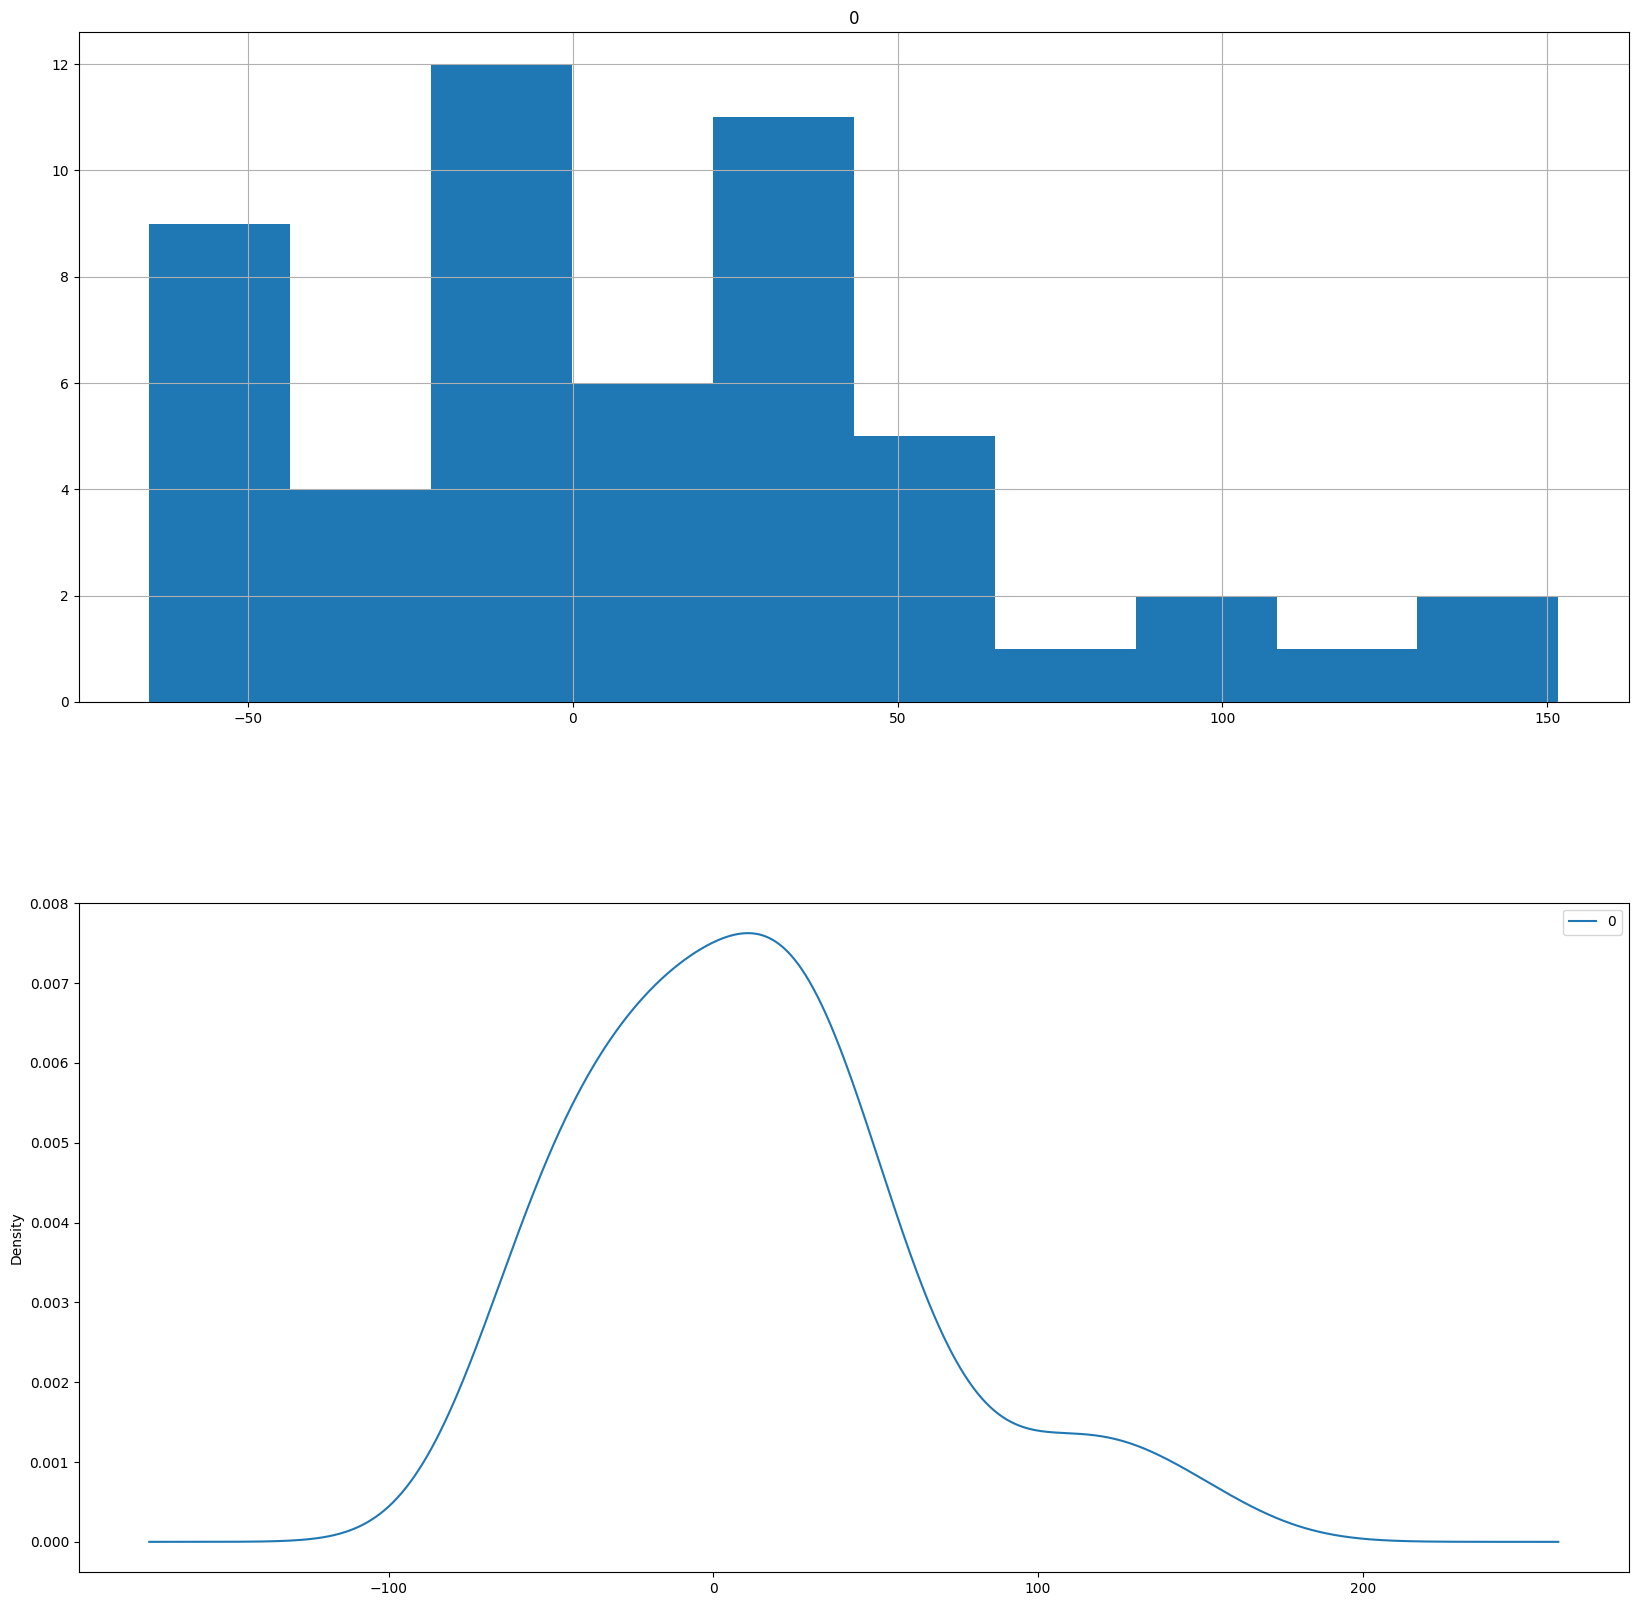

In [73]:
#residuals
residuals = [test[i] - predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
plt.figure(figsize=(20,20))
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax = plt.gca())
plt.show()

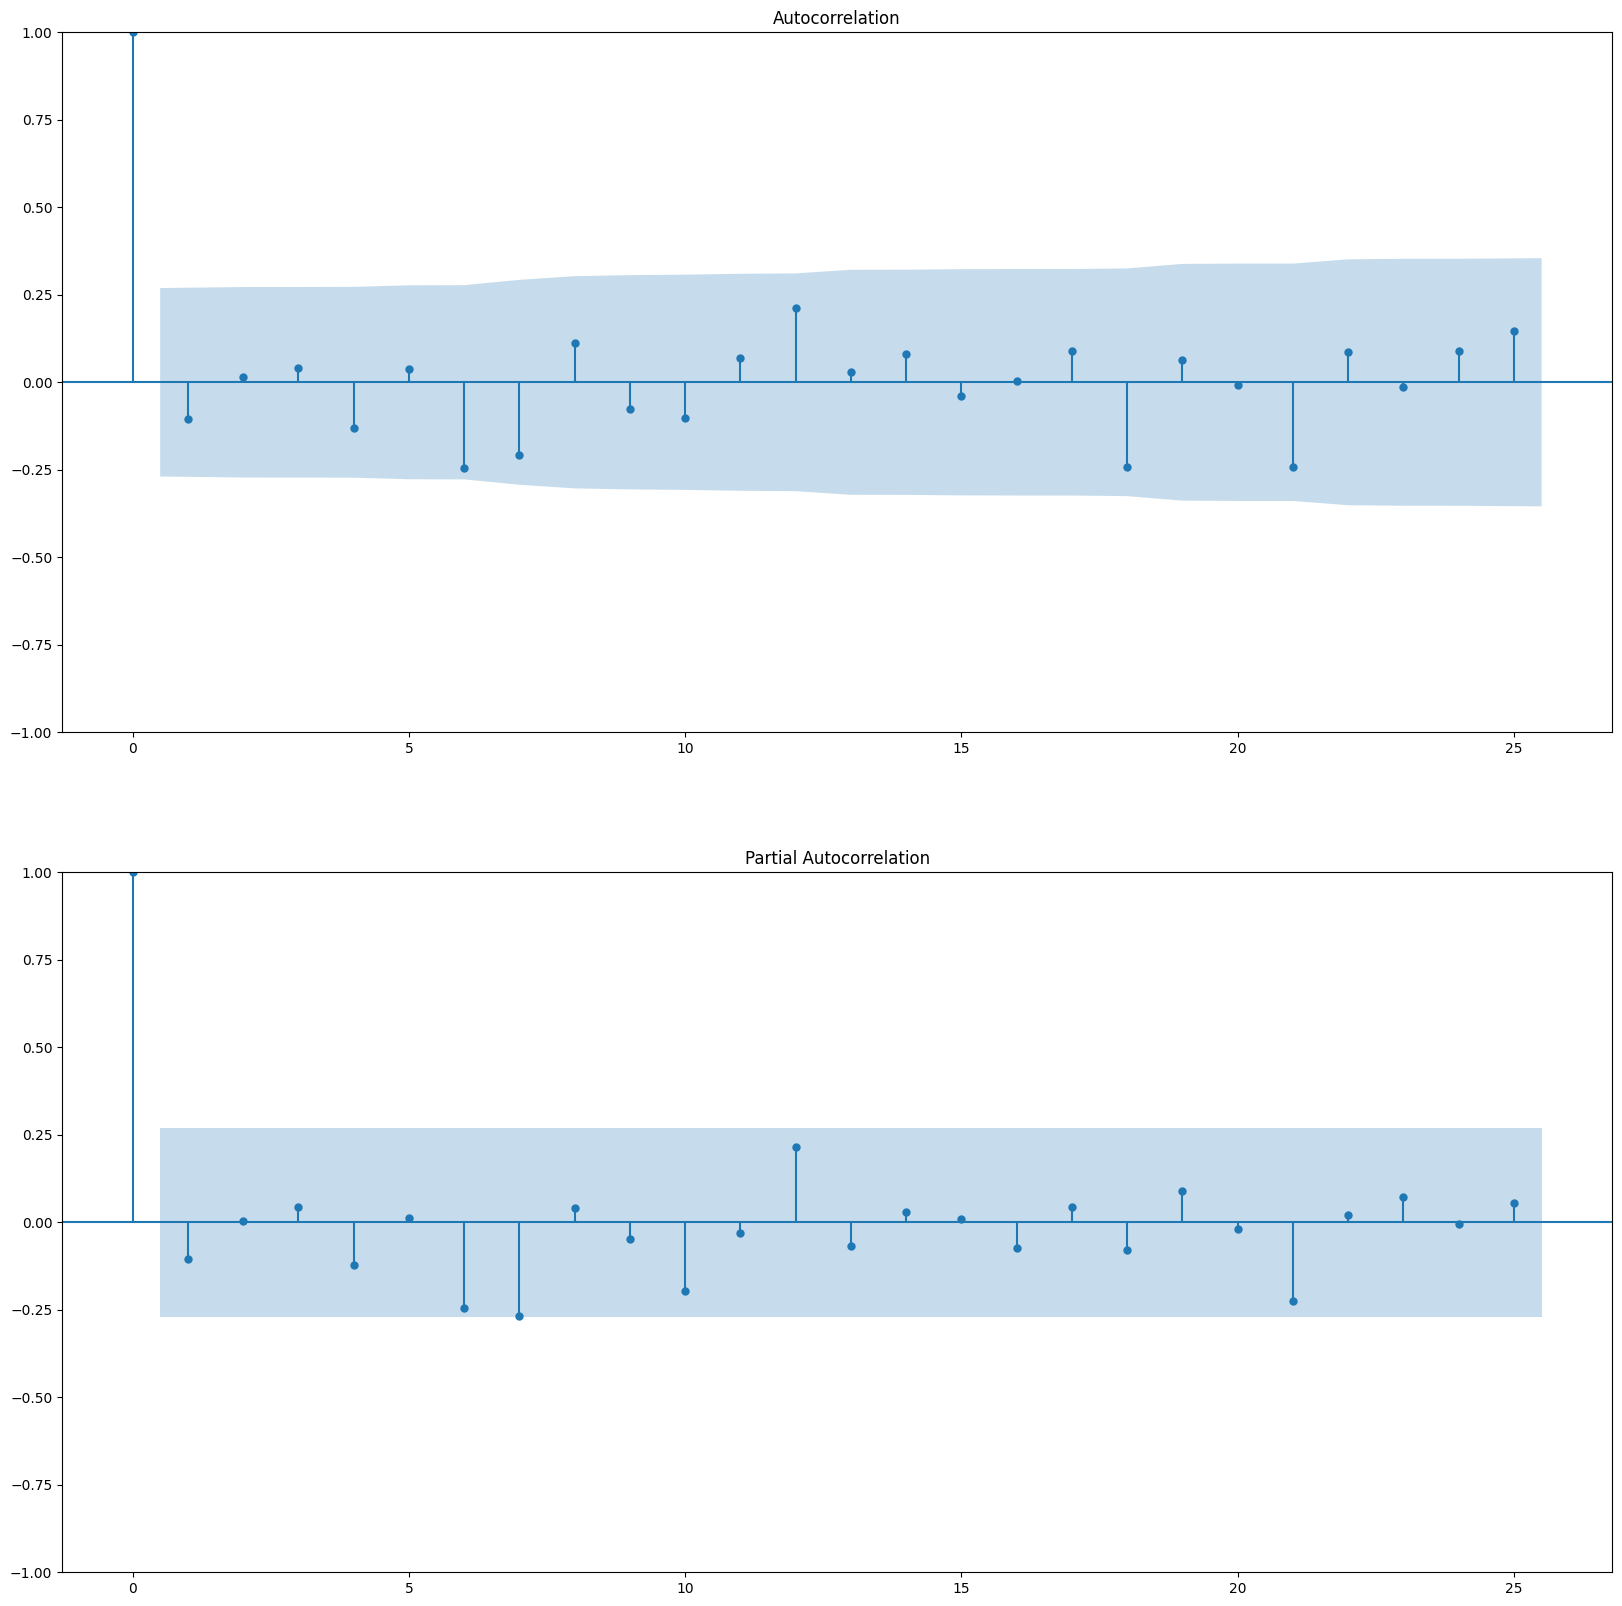

In [74]:
#errors
plt.figure(figsize=(20,20))
plt.subplot(211)
plot_acf(residuals, lags = 25, ax = plt.gca())
plt.subplot(212)
plot_pacf(residuals, lags = 25, ax = plt.gca())
plt.show()

In [134]:

X

array([ 41,  39,  50,  40,  43,  38,  44,  35,  39,  35,  29,  49,  50,
        59,  63,  32,  39,  47,  53,  60,  57,  52,  70,  90,  74,  62,
        55,  84,  94,  70, 108, 139, 120,  97, 126, 149, 158, 124, 140,
       109, 114,  77, 120, 133, 110,  92,  97,  78,  99, 107, 112,  90,
        98, 125, 155, 190, 236, 189, 174, 178, 136, 161, 171, 149, 184,
       155, 276, 224, 213, 279, 268, 287, 238, 213, 257, 293, 212, 246,
       353, 339, 308, 247, 257, 322, 298, 273, 312, 249, 286, 279, 309,
       401, 309, 328, 353, 354, 327, 324, 285, 243, 241, 287, 355, 460,
       364, 487], dtype=int64)

lambda: 0.26006033924618177


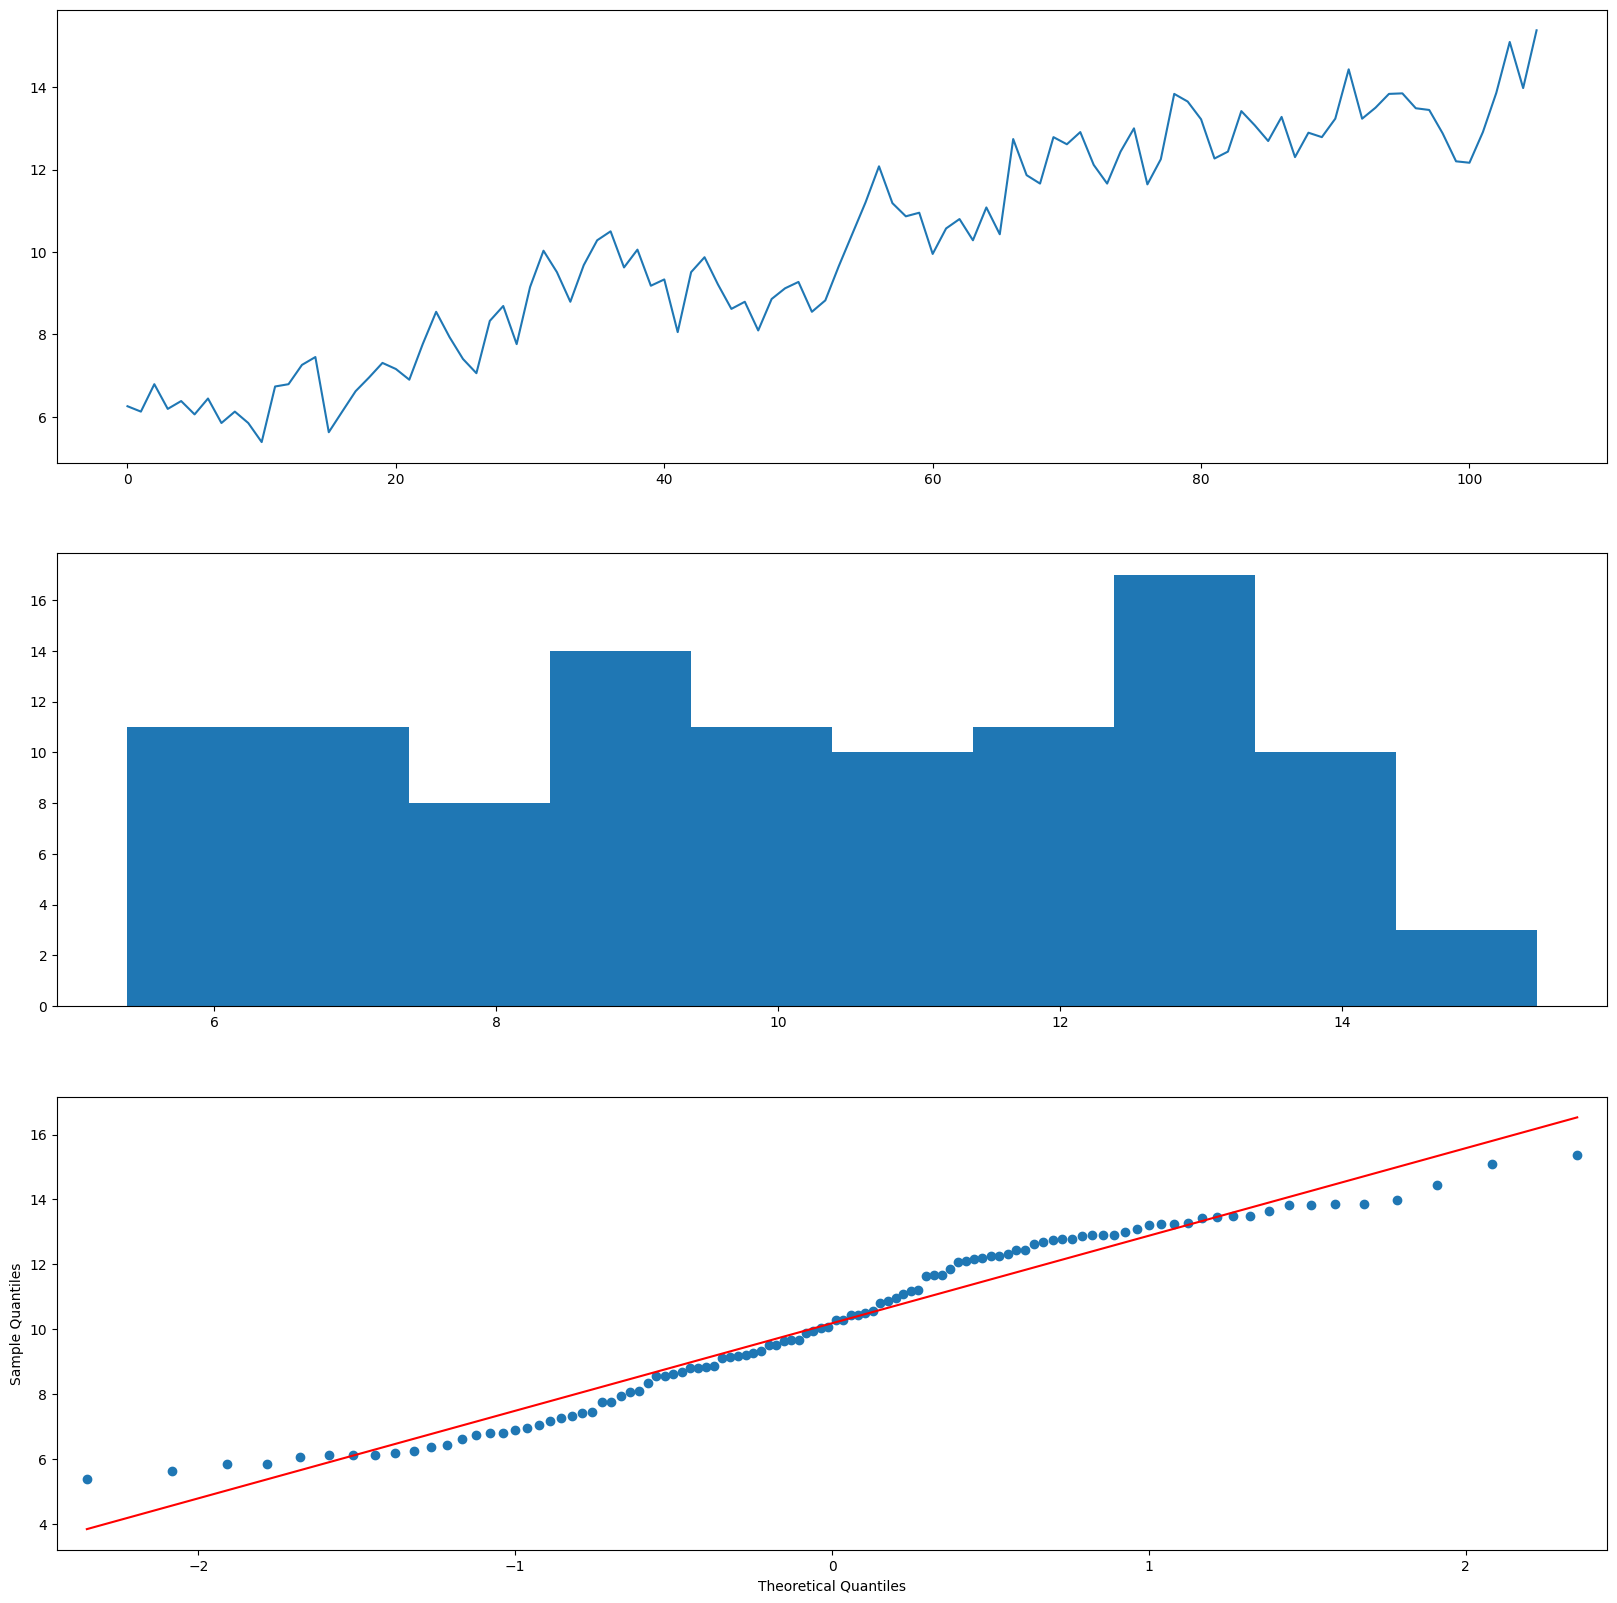

In [138]:
X = df.values
X = np.ravel(X)
transformed, lam = boxcox(X)
print(f'lambda: {lam}')
plt.figure(1, figsize=(20,20))
plt.subplot(311)
plt.plot(transformed)
plt.subplot(312)
plt.hist(transformed)
plt.subplot(313)
qqplot(transformed, line = 'r', ax =plt.gca())
plt.show()

In [141]:
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam*value+1)/lam)

In [178]:
history = [x for x in train]
history = np.array(history).ravel()
predictions = list()
for i in range(len(test)):
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam = history, 1
    model = ARIMA(transformed, order=(5,2,6))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = boxcox_inverse(yhat, lam)
    predictions.append(yhat)
    obs = test[i]
    history = np.concatenate((history, obs))
    print(f'Predicted= {yhat}, Expected= {obs}')
rmse = sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')


Predicted= 100.99313666633009, Expected= [125.]
Predicted= 128.54968778445988, Expected= [155.]
Predicted= 124.5603429659002, Expected= [190.]
Predicted= 173.06235380522833, Expected= [236.]
Predicted= 265.70789075164294, Expected= [189.]
Predicted= 185.96552837086688, Expected= [174.]
Predicted= 173.70386590594734, Expected= [178.]
Predicted= 217.0966950545022, Expected= [136.]
Predicted= 148.86798285361166, Expected= [161.]
Predicted= 157.79622126671543, Expected= [171.]
Predicted= 190.6368818479163, Expected= [149.]
Predicted= 160.14726442699745, Expected= [184.]
Predicted= 182.71733884955725, Expected= [155.]
Predicted= 168.24265694558173, Expected= [276.]
Predicted= 254.11153006681369, Expected= [224.]
Predicted= 212.3917682699566, Expected= [213.]
Predicted= 222.78521577860172, Expected= [279.]
Predicted= 261.7459648509436, Expected= [268.]
Predicted= 248.4566482167021, Expected= [287.]
Predicted= 296.8436319998217, Expected= [238.]
Predicted= 223.64541583023362, Expected= [213.]

In [179]:
X = df.values
X = X.astype('float32')
#fit model
model = ARIMA(X, order=(5,2,6))
model_fit = model.fit()
#save model
model_fit.save('../output/robberies_dataset/model.pkl')
np.save('../output/robberies_dataset/model_lamda.npy', [lam])

In [186]:
model_fit = ARIMAResults.load('../output/robberies_dataset/model.pkl')
lam = np.load('../output/robberies_dataset/model_lamda.npy')
yhat = model_fit.forecast()[0]
print(f'predicted: {yhat}')

predicted: 482.5657655339037


Predicted= 482.5657655339037, Expected= [391.]
Predicted= 425.3011267677513, Expected= [500.]
Predicted= 433.2003178603368, Expected= [451.]
Predicted= 458.75782862453843, Expected= [375.]
Predicted= 452.9003327185531, Expected= [372.]
Predicted= 388.6247442048708, Expected= [302.]
Predicted= 280.96103596092877, Expected= [316.]
Predicted= 330.97062067718196, Expected= [398.]
Predicted= 386.5413354324465, Expected= [394.]
Predicted= 411.9778710519232, Expected= [431.]
Predicted= 408.8515135234693, Expected= [431.]
RMSE: 61.772175978320846


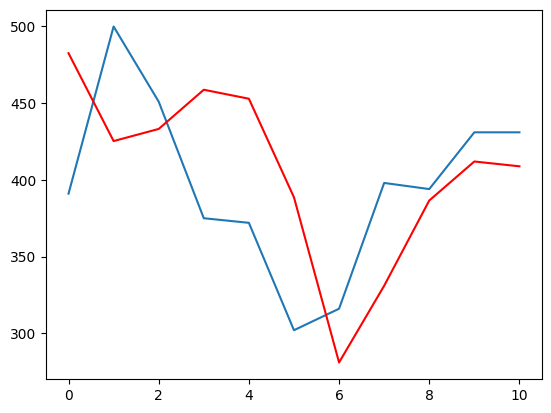

In [187]:
train = pd.read_csv('../output/robberies_dataset/train.csv', index_col=0, header=0, parse_dates=True)
X = train.values.astype('float32')
history = [x for x in X]
test = pd.read_csv('../output/robberies_dataset/test.csv', index_col=0, header=0, parse_dates=True)
y = test.values.astype('float32')
model_fit = ARIMAResults.load('../output/robberies_dataset/model.pkl')
predictions = list()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
print(f'Predicted= {yhat}, Expected= {y[0]}')
for i in range(1,len(y)):
    model = ARIMA(history, order=(5,2,6))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)
    print(f'Predicted= {yhat}, Expected= {obs}')
rmse = sqrt(mean_squared_error(y, predictions))
print(f'RMSE: {rmse}')
plt.plot(y)
plt.plot(predictions, color ='red')
plt.show()